In [61]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
df = pd.read_csv("/content/drive/MyDrive/encoded_data.csv")

In [63]:
df.head()

,Unnamed: 0,month,day_of_month,distance,cancelled,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,...,unique_carrier_HA,unique_carrier_MQ,unique_carrier_NW,unique_carrier_OH,unique_carrier_OO,unique_carrier_UA,unique_carrier_US,unique_carrier_WN,unique_carrier_XE,unique_carrier_YV
0,0,6,22,1037,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1,12,17,1562,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,21,599,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,3,5,3,1372,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,8,8,406,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8037798 entries, 0 to 8037797
Data columns (total 32 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   month                      int64  
 2   day_of_month               int64  
 3   distance                   int64  
 4   cancelled                  int64  
 5   carrier_delay              float64
 6   weather_delay              float64
 7   nas_delay                  float64
 8   security_delay             float64
 9   late_aircraft_delay        float64
 10  arrival_delay_indicator    int64  
 11  departure_delay_indicator  int64  
 12  unique_carrier_9E          int64  
 13  unique_carrier_AA          int64  
 14  unique_carrier_AQ          int64  
 15  unique_carrier_AS          int64  
 16  unique_carrier_B6          int64  
 17  unique_carrier_CO          int64  
 18  unique_carrier_DL          int64  
 19  unique_carrier_EV          int64  
 20  un

In [64]:
X = df.drop(columns=['cancelled'])  # Features
y = df['cancelled']  # Target variable

In [65]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 7877050, 1: 160748})


### Resolving Class Imbalance problem using SMOTE algorithm

In [66]:
#instance of SMOTE class
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)


In [67]:
resampled = Counter(y_resampled)
print(resampled)

Counter({0: 7877050, 1: 7877050})


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.05, random_state=42)


In [11]:
print("X train shape:",X_train.shape)
print("y train shape:", y_train.shape)
print("X test shape:",X_test.shape)
print("y test shape:", y_test.shape)

X train shape: (14966395, 31)
y train shape: (14966395,)
X test shape: (787705, 31)
y test shape: (787705,)


In [ ]:
y_test

9625673     1
14590796    1
407037      0
6644022     0
8186544     1
           ..
14969508    1
11542740    1
10259666    1
3616108     0
3033840     0
Name: cancelled, Length: 787705, dtype: int64

### Visualizing data

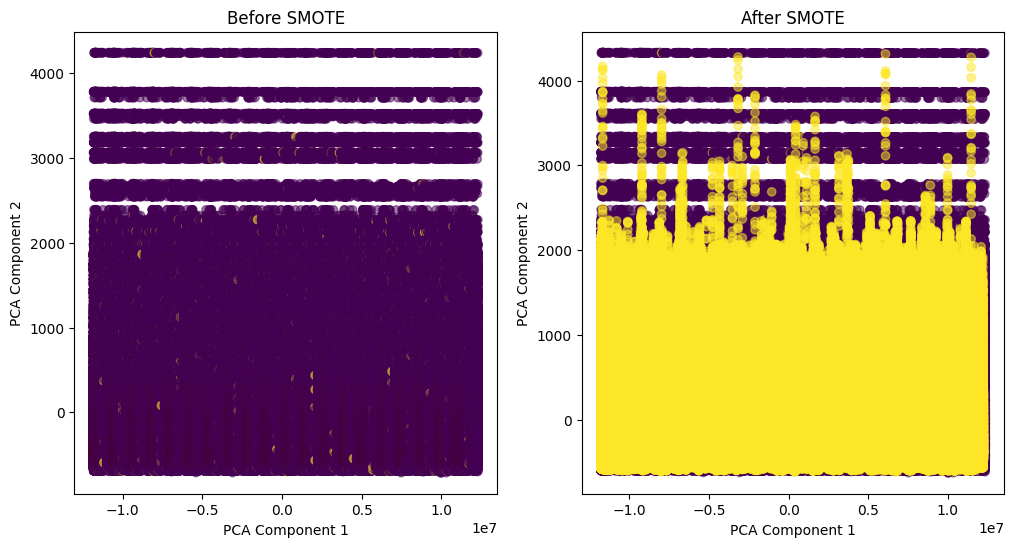

In [72]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA with 2 principal components (for 2D visualization)
pca = PCA(n_components=2)

# Apply PCA
X_pca_before = pca.fit_transform(X)
X_pca_after = pca.fit_transform(X_resampled)

# scatter plots for before and after SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('Before SMOTE')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca_after[:, 0], X_pca_after[:, 1], c=y_resampled, cmap='viridis', alpha=0.5)
plt.title('After SMOTE')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

#print(X_pca_before[0])


##  1) XGBoost

In [12]:
! pip install xgboost

In [ ]:
!pip install tqdm

In [13]:
import xgboost as xgb
from tqdm import tqdm

# DMatrix for XGBoost (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [18]:
params = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 3,                   # Maximum depth of each tree
    'learning_rate': 0.1,            # Step size shrinkage to prevent overfitting
    'num_boost_round': 50              # Number of boosting rounds (trees)
}

In [19]:
with tqdm(total=params['num_boost_round']) as pbar:
    for i in range(params['num_boost_round']):
        bst = xgb.train(params, dtrain, num_boost_round=1)
        pbar.update(1)

  0%|          | 0/50 [00:00<?, ?it/s]

[14:53:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 1/50 [00:05<04:29,  5.50s/it]

[14:53:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▍         | 2/50 [00:10<04:06,  5.14s/it]

[14:53:42] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▌         | 3/50 [00:15<04:04,  5.19s/it]

[14:53:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 4/50 [00:20<04:00,  5.22s/it]

[14:53:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|█         | 5/50 [00:26<04:00,  5.35s/it]

[14:53:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 6/50 [00:32<03:59,  5.43s/it]

[14:54:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▍        | 7/50 [00:37<03:51,  5.37s/it]

[14:54:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▌        | 8/50 [00:43<03:58,  5.68s/it]

[14:54:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 9/50 [00:49<03:58,  5.83s/it]

[14:54:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|██        | 10/50 [00:55<03:53,  5.83s/it]

[14:54:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 11/50 [01:01<03:46,  5.81s/it]

[14:54:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▍       | 12/50 [01:06<03:30,  5.53s/it]

[14:54:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▌       | 13/50 [01:11<03:21,  5.45s/it]

[14:54:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 14/50 [01:16<03:10,  5.29s/it]

[14:54:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|███       | 15/50 [01:21<03:00,  5.16s/it]

[14:54:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 16/50 [01:26<02:55,  5.16s/it]

[14:54:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▍      | 17/50 [01:31<02:47,  5.07s/it]

[14:55:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▌      | 18/50 [01:37<02:47,  5.25s/it]

[14:55:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 19/50 [01:42<02:41,  5.20s/it]

[14:55:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|████      | 20/50 [01:47<02:33,  5.11s/it]

[14:55:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 21/50 [01:52<02:28,  5.12s/it]

[14:55:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▍     | 22/50 [01:57<02:21,  5.06s/it]

[14:55:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▌     | 23/50 [02:02<02:19,  5.15s/it]

[14:55:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 24/50 [02:07<02:13,  5.14s/it]

[14:55:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|█████     | 25/50 [02:12<02:06,  5.05s/it]

[14:55:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 26/50 [02:17<02:02,  5.12s/it]

[14:55:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▍    | 27/50 [02:22<01:55,  5.03s/it]

[14:55:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▌    | 28/50 [02:27<01:49,  4.96s/it]

[14:55:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 29/50 [02:32<01:45,  5.01s/it]

[14:56:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|██████    | 30/50 [02:37<01:39,  4.98s/it]

[14:56:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 31/50 [02:43<01:38,  5.19s/it]

[14:56:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▍   | 32/50 [02:48<01:33,  5.19s/it]

[14:56:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▌   | 33/50 [02:52<01:26,  5.07s/it]

[14:56:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 34/50 [02:58<01:21,  5.08s/it]

[14:56:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|███████   | 35/50 [03:03<01:15,  5.03s/it]

[14:56:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 36/50 [03:08<01:11,  5.12s/it]

[14:56:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▍  | 37/50 [03:13<01:06,  5.12s/it]

[14:56:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▌  | 38/50 [03:18<01:00,  5.05s/it]

[14:56:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 39/50 [03:23<00:56,  5.12s/it]

[14:56:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|████████  | 40/50 [03:28<00:50,  5.06s/it]

[14:57:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 41/50 [03:33<00:45,  5.01s/it]

[14:57:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▍ | 42/50 [03:38<00:40,  5.05s/it]

[14:57:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▌ | 43/50 [03:43<00:35,  5.07s/it]

[14:57:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 44/50 [03:49<00:31,  5.21s/it]

[14:57:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|█████████ | 45/50 [03:54<00:25,  5.14s/it]

[14:57:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 46/50 [03:59<00:20,  5.06s/it]

[14:57:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▍| 47/50 [04:04<00:15,  5.06s/it]

[14:57:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▌| 48/50 [04:09<00:10,  5.01s/it]

[14:57:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 49/50 [04:14<00:05,  5.11s/it]

[14:57:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



100%|██████████| 50/50 [04:19<00:00,  5.19s/it]


In [24]:
# Save the trained model
bst.save_model("/content/drive/MyDrive/model_weights/bst.h5")

In [20]:
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Make predictions
y_pred_prob = bst.predict(dtest)
y_pred_labels = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8273224113088021


In [25]:
report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    393601
           1       0.75      0.99      0.85    394104

    accuracy                           0.83    787705
   macro avg       0.87      0.83      0.82    787705
weighted avg       0.87      0.83      0.82    787705



In [26]:
params_0 = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 5,                   # Maximum depth of each tree
    'learning_rate': 0.01,            # Step size shrinkage to prevent overfitting
    'num_boost_round': 100              # Number of boosting rounds (trees)
}

In [27]:
with tqdm(total=params_0['num_boost_round']) as pbar:
    for i in range(1):
        model = xgb.train(params_0, dtrain, num_boost_round=params_0['num_boost_round'])
        pbar.update(1)

  0%|          | 0/100 [00:00<?, ?it/s]

[15:02:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|          | 1/100 [08:40<14:19:38, 521.00s/it]


In [28]:
# Make predictions
y_pred_prob_1 = model.predict(dtest)
y_pred_labels_1 = [1 if prob > 0.5 else 0 for prob in y_pred_prob_1]

In [29]:
# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred_labels_1)
print(f"Accuracy: {accuracy_1}")

Accuracy: 0.8416856564322938


In [30]:
report_1 = classification_report(y_test, y_pred_labels_1)
print("Classification Report:\n", report_1)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.69      0.81    393601
           1       0.76      0.99      0.86    394104

    accuracy                           0.84    787705
   macro avg       0.88      0.84      0.84    787705
weighted avg       0.88      0.84      0.84    787705



In [31]:
# Save the trained model
model.save_model("/content/drive/MyDrive/model_weights/model.h5")

In [32]:
params_1 = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 6,                   # Maximum depth of each tree
    'learning_rate': 0.001,            # Step size shrinkage to prevent overfitting
    'num_boost_round': 120              # Number of boosting rounds (trees)
}

In [33]:
with tqdm(total=params_1['num_boost_round']) as pbar:
    for i in range(params_1['num_boost_round']):
        model_2 = xgb.train(params_1, dtrain, num_boost_round=1)
        pbar.update(1)

  0%|          | 0/120 [00:00<?, ?it/s]

[15:14:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|          | 1/120 [00:06<12:39,  6.38s/it]

[15:14:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 2/120 [00:11<11:32,  5.87s/it]

[15:14:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▎         | 3/120 [00:17<11:35,  5.95s/it]

[15:14:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  3%|▎         | 4/120 [00:23<11:13,  5.80s/it]

[15:14:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▍         | 5/120 [00:28<10:48,  5.64s/it]

[15:14:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  5%|▌         | 6/120 [00:34<10:38,  5.60s/it]

[15:14:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▌         | 7/120 [00:39<10:22,  5.51s/it]

[15:14:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  7%|▋         | 8/120 [00:46<10:46,  5.77s/it]

[15:15:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 9/120 [00:51<10:27,  5.65s/it]

[15:15:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 10/120 [00:56<10:14,  5.59s/it]

[15:15:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  9%|▉         | 11/120 [01:02<10:09,  5.59s/it]

[15:15:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|█         | 12/120 [01:07<09:48,  5.45s/it]

[15:15:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 11%|█         | 13/120 [01:13<09:50,  5.52s/it]

[15:15:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 14/120 [01:18<09:39,  5.47s/it]

[15:15:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▎        | 15/120 [01:24<09:47,  5.59s/it]

[15:15:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 13%|█▎        | 16/120 [01:30<09:40,  5.58s/it]

[15:15:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▍        | 17/120 [01:35<09:25,  5.49s/it]

[15:15:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 15%|█▌        | 18/120 [01:40<09:19,  5.48s/it]

[15:15:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▌        | 19/120 [01:46<09:06,  5.42s/it]

[15:16:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 17%|█▋        | 20/120 [01:52<09:27,  5.67s/it]

[15:16:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 21/120 [01:57<09:10,  5.56s/it]

[15:16:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 22/120 [02:03<09:03,  5.55s/it]

[15:16:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 19%|█▉        | 23/120 [02:08<08:57,  5.55s/it]

[15:16:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|██        | 24/120 [02:13<08:43,  5.45s/it]

[15:16:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 21%|██        | 25/120 [02:19<08:41,  5.49s/it]

[15:16:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 26/120 [02:24<08:32,  5.46s/it]

[15:16:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▎       | 27/120 [02:30<08:36,  5.56s/it]

[15:16:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 23%|██▎       | 28/120 [02:36<08:29,  5.54s/it]

[15:16:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▍       | 29/120 [02:41<08:15,  5.45s/it]

[15:16:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 25%|██▌       | 30/120 [02:46<08:09,  5.43s/it]

[15:17:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▌       | 31/120 [02:52<07:59,  5.39s/it]

[15:17:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 27%|██▋       | 32/120 [02:58<08:21,  5.69s/it]

[15:17:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 33/120 [03:03<08:05,  5.58s/it]

[15:17:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 34/120 [03:09<07:52,  5.50s/it]

[15:17:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 29%|██▉       | 35/120 [03:14<07:47,  5.50s/it]

[15:17:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|███       | 36/120 [03:19<07:35,  5.42s/it]

[15:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 31%|███       | 37/120 [03:25<07:31,  5.44s/it]

[15:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 38/120 [03:30<07:22,  5.40s/it]

[15:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▎      | 39/120 [03:36<07:28,  5.53s/it]

[15:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 33%|███▎      | 40/120 [03:42<07:22,  5.53s/it]

[15:17:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▍      | 41/120 [03:47<07:10,  5.45s/it]

[15:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 35%|███▌      | 42/120 [03:52<07:05,  5.46s/it]

[15:18:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▌      | 43/120 [03:57<06:54,  5.38s/it]

[15:18:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 37%|███▋      | 44/120 [04:04<07:09,  5.65s/it]

[15:18:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 45/120 [04:09<06:54,  5.53s/it]

[15:18:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 46/120 [04:14<06:45,  5.48s/it]

[15:18:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 39%|███▉      | 47/120 [04:20<06:41,  5.50s/it]

[15:18:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|████      | 48/120 [04:25<06:30,  5.42s/it]

[15:18:42] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 41%|████      | 49/120 [04:31<06:30,  5.50s/it]

[15:18:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 50/120 [04:36<06:20,  5.44s/it]

[15:18:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▎     | 51/120 [04:42<06:22,  5.55s/it]

[15:18:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 43%|████▎     | 52/120 [04:47<06:16,  5.53s/it]

[15:19:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▍     | 53/120 [04:53<06:06,  5.48s/it]

[15:19:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 45%|████▌     | 54/120 [04:58<06:02,  5.49s/it]

[15:19:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▌     | 55/120 [05:04<05:53,  5.43s/it]

[15:19:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 47%|████▋     | 56/120 [05:10<06:00,  5.64s/it]

[15:19:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 57/120 [05:15<05:49,  5.54s/it]

[15:19:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 58/120 [05:21<05:48,  5.62s/it]

[15:19:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 49%|████▉     | 59/120 [05:26<05:41,  5.60s/it]

[15:19:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|█████     | 60/120 [05:32<05:29,  5.50s/it]

[15:19:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 51%|█████     | 61/120 [05:37<05:24,  5.49s/it]

[15:19:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 62/120 [05:42<05:15,  5.44s/it]

[15:19:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▎    | 63/120 [05:48<05:20,  5.62s/it]

[15:20:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 53%|█████▎    | 64/120 [05:54<05:11,  5.57s/it]

[15:20:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▍    | 65/120 [05:59<05:02,  5.50s/it]

[15:20:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▌    | 66/120 [06:05<04:55,  5.48s/it]

[15:20:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▌    | 67/120 [06:10<04:46,  5.41s/it]

[15:20:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▋    | 68/120 [06:16<04:48,  5.56s/it]

[15:20:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▊    | 69/120 [06:21<04:38,  5.47s/it]

[15:20:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 70/120 [06:26<04:31,  5.43s/it]

[15:20:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 59%|█████▉    | 71/120 [06:32<04:27,  5.46s/it]

[15:20:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|██████    | 72/120 [06:37<04:19,  5.41s/it]

[15:20:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 61%|██████    | 73/120 [06:43<04:16,  5.47s/it]

[15:20:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 74/120 [06:48<04:08,  5.41s/it]

[15:21:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▎   | 75/120 [06:54<04:08,  5.52s/it]

[15:21:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 63%|██████▎   | 76/120 [06:59<04:02,  5.51s/it]

[15:21:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▍   | 77/120 [07:05<03:54,  5.46s/it]

[15:21:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 65%|██████▌   | 78/120 [07:10<03:49,  5.47s/it]

[15:21:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▌   | 79/120 [07:15<03:40,  5.38s/it]

[15:21:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 67%|██████▋   | 80/120 [07:22<03:44,  5.61s/it]

[15:21:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 81/120 [07:27<03:34,  5.50s/it]

[15:21:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 82/120 [07:32<03:26,  5.43s/it]

[15:21:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 69%|██████▉   | 83/120 [07:38<03:22,  5.48s/it]

[15:21:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|███████   | 84/120 [07:43<03:13,  5.37s/it]

[15:21:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 71%|███████   | 85/120 [07:48<03:11,  5.46s/it]

[15:22:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 86/120 [07:54<03:03,  5.41s/it]

[15:22:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▎  | 87/120 [08:00<03:02,  5.54s/it]

[15:22:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 73%|███████▎  | 88/120 [08:05<02:57,  5.55s/it]

[15:22:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▍  | 89/120 [08:10<02:49,  5.47s/it]

[15:22:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 75%|███████▌  | 90/120 [08:16<02:43,  5.46s/it]

[15:22:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▌  | 91/120 [08:21<02:36,  5.38s/it]

[15:22:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 77%|███████▋  | 92/120 [08:27<02:38,  5.65s/it]

[15:22:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 93/120 [08:33<02:29,  5.53s/it]

[15:22:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 94/120 [08:38<02:23,  5.54s/it]

[15:22:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 79%|███████▉  | 95/120 [08:44<02:18,  5.54s/it]

[15:23:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|████████  | 96/120 [08:49<02:10,  5.43s/it]

[15:23:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 81%|████████  | 97/120 [08:55<02:06,  5.48s/it]

[15:23:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 98/120 [09:00<01:58,  5.41s/it]

[15:23:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▎ | 99/120 [09:06<01:57,  5.59s/it]

[15:23:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 83%|████████▎ | 100/120 [09:11<01:51,  5.57s/it]

[15:23:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▍ | 101/120 [09:17<01:44,  5.49s/it]

[15:23:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 85%|████████▌ | 102/120 [09:22<01:38,  5.49s/it]

[15:23:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▌ | 103/120 [09:27<01:32,  5.44s/it]

[15:23:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 87%|████████▋ | 104/120 [09:34<01:30,  5.68s/it]

[15:23:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 105/120 [09:39<01:23,  5.56s/it]

[15:23:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 106/120 [09:44<01:17,  5.51s/it]

[15:24:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 89%|████████▉ | 107/120 [09:50<01:11,  5.51s/it]

[15:24:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|█████████ | 108/120 [09:55<01:04,  5.42s/it]

[15:24:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 91%|█████████ | 109/120 [10:01<01:00,  5.48s/it]

[15:24:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 110/120 [10:06<00:54,  5.42s/it]

[15:24:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▎| 111/120 [10:12<00:50,  5.64s/it]

[15:24:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 93%|█████████▎| 112/120 [10:17<00:44,  5.56s/it]

[15:24:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▍| 113/120 [10:23<00:38,  5.49s/it]

[15:24:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 95%|█████████▌| 114/120 [10:28<00:33,  5.53s/it]

[15:24:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▌| 115/120 [10:34<00:27,  5.47s/it]

[15:24:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 97%|█████████▋| 116/120 [10:40<00:22,  5.71s/it]

[15:24:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 117/120 [10:45<00:16,  5.57s/it]

[15:25:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 118/120 [10:51<00:11,  5.52s/it]

[15:25:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 99%|█████████▉| 119/120 [10:56<00:05,  5.58s/it]

[15:25:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



100%|██████████| 120/120 [11:02<00:00,  5.52s/it]


In [37]:
# Save the trained model
model_2.save_model("/content/drive/MyDrive/model_weights/model_2.h5")

In [34]:
# Make predictions
y_pred_prob_2 = model_2.predict(dtest)
y_pred_labels_2 = [1 if prob > 0.5 else 0 for prob in y_pred_prob_2]

In [35]:
# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred_labels_2)
print(f"Accuracy: {accuracy_2}")

Accuracy: 0.861816289092998


In [36]:
report_2 = classification_report(y_test, y_pred_labels_2)
print("Classification Report:\n", report_2)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.84    393601
           1       0.80      0.97      0.88    394104

    accuracy                           0.86    787705
   macro avg       0.88      0.86      0.86    787705
weighted avg       0.88      0.86      0.86    787705



In [43]:
params_2 = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 9,                   # Maximum depth of each tree
    'learning_rate': 0.0001,            # Step size shrinkage to prevent overfitting
    'num_boost_round': 170              # Number of boosting rounds (trees)
}

In [44]:
with tqdm(total=params_2['num_boost_round']) as pbar:
    for i in range(params_2['num_boost_round']):
        model_3 = xgb.train(params_2, dtrain, num_boost_round=1)
        pbar.update(1)

  0%|          | 0/170 [00:00<?, ?it/s]

[15:33:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|          | 1/170 [00:06<19:29,  6.92s/it]

[15:33:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|          | 2/170 [00:13<18:19,  6.54s/it]

[15:33:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 3/170 [00:19<18:28,  6.64s/it]

[15:34:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 4/170 [00:26<17:45,  6.42s/it]

[15:34:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  3%|▎         | 5/170 [00:32<17:54,  6.51s/it]

[15:34:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▎         | 6/170 [00:38<17:28,  6.39s/it]

[15:34:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▍         | 7/170 [00:45<17:17,  6.37s/it]

[15:34:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  5%|▍         | 8/170 [00:51<17:01,  6.30s/it]

[15:34:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  5%|▌         | 9/170 [00:57<16:48,  6.26s/it]

[15:34:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▌         | 10/170 [01:03<16:42,  6.27s/it]

[15:34:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▋         | 11/170 [01:09<16:21,  6.17s/it]

[15:34:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  7%|▋         | 12/170 [01:15<16:11,  6.15s/it]

[15:35:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 13/170 [01:21<16:00,  6.12s/it]

[15:35:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 14/170 [01:28<15:54,  6.12s/it]

[15:35:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  9%|▉         | 15/170 [01:33<15:34,  6.03s/it]

[15:35:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  9%|▉         | 16/170 [01:40<15:35,  6.07s/it]

[15:35:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|█         | 17/170 [01:45<15:23,  6.03s/it]

[15:35:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 11%|█         | 18/170 [01:52<15:55,  6.28s/it]

[15:35:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 11%|█         | 19/170 [01:58<15:36,  6.20s/it]

[15:35:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 20/170 [02:05<16:07,  6.45s/it]

[15:35:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 21/170 [02:11<15:38,  6.30s/it]

[15:35:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 13%|█▎        | 22/170 [02:18<16:04,  6.52s/it]

[15:36:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▎        | 23/170 [02:24<15:26,  6.30s/it]

[15:36:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▍        | 24/170 [02:31<15:40,  6.44s/it]

[15:36:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 15%|█▍        | 25/170 [02:37<15:14,  6.31s/it]

[15:36:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 15%|█▌        | 26/170 [02:43<15:02,  6.27s/it]

[15:36:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▌        | 27/170 [02:49<14:46,  6.20s/it]

[15:36:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▋        | 28/170 [02:55<14:28,  6.12s/it]

[15:36:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 17%|█▋        | 29/170 [03:01<14:18,  6.09s/it]

[15:36:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 30/170 [03:07<14:07,  6.05s/it]

[15:36:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 31/170 [03:13<14:04,  6.08s/it]

[15:36:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 19%|█▉        | 32/170 [03:19<13:51,  6.02s/it]

[15:37:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 19%|█▉        | 33/170 [03:25<13:54,  6.09s/it]

[15:37:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|██        | 34/170 [03:31<13:41,  6.04s/it]

[15:37:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 21%|██        | 35/170 [03:38<13:53,  6.17s/it]

[15:37:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 21%|██        | 36/170 [03:44<13:34,  6.08s/it]

[15:37:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 37/170 [03:50<14:00,  6.32s/it]

[15:37:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 38/170 [03:56<13:40,  6.22s/it]

[15:37:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 23%|██▎       | 39/170 [04:03<13:59,  6.41s/it]

[15:37:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▎       | 40/170 [04:09<13:33,  6.26s/it]

[15:37:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▍       | 41/170 [04:16<13:49,  6.43s/it]

[15:38:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 25%|██▍       | 42/170 [04:22<13:22,  6.27s/it]

[15:38:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 25%|██▌       | 43/170 [04:28<13:15,  6.27s/it]

[15:38:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▌       | 44/170 [04:34<13:03,  6.22s/it]

[15:38:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▋       | 45/170 [04:40<12:53,  6.18s/it]

[15:38:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 27%|██▋       | 46/170 [04:46<12:42,  6.15s/it]

[15:38:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 47/170 [04:52<12:23,  6.04s/it]

[15:38:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 48/170 [04:58<12:15,  6.03s/it]

[15:38:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 29%|██▉       | 49/170 [05:04<12:03,  5.98s/it]

[15:38:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 29%|██▉       | 50/170 [05:10<12:02,  6.02s/it]

[15:38:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|███       | 51/170 [05:16<11:46,  5.94s/it]

[15:39:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 31%|███       | 52/170 [05:23<12:09,  6.19s/it]

[15:39:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 31%|███       | 53/170 [05:28<11:47,  6.05s/it]

[15:39:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 54/170 [05:35<12:09,  6.29s/it]

[15:39:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 55/170 [05:41<11:44,  6.13s/it]

[15:39:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 33%|███▎      | 56/170 [05:48<11:52,  6.25s/it]

[15:39:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▎      | 57/170 [05:54<11:34,  6.15s/it]

[15:39:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▍      | 58/170 [05:59<11:17,  6.05s/it]

[15:39:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 35%|███▍      | 59/170 [06:05<11:07,  6.01s/it]

[15:39:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 35%|███▌      | 60/170 [06:11<10:57,  5.98s/it]

[15:39:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▌      | 61/170 [06:17<10:53,  6.00s/it]

[15:40:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▋      | 62/170 [06:23<10:44,  5.97s/it]

[15:40:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 37%|███▋      | 63/170 [06:29<10:46,  6.04s/it]

[15:40:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 64/170 [06:35<10:31,  5.95s/it]

[15:40:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 65/170 [06:42<10:48,  6.17s/it]

[15:40:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 39%|███▉      | 66/170 [06:48<10:29,  6.05s/it]

[15:40:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 39%|███▉      | 67/170 [06:54<10:47,  6.29s/it]

[15:40:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|████      | 68/170 [07:00<10:25,  6.13s/it]

[15:40:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 41%|████      | 69/170 [07:07<10:38,  6.32s/it]

[15:40:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 41%|████      | 70/170 [07:13<10:27,  6.28s/it]

[15:40:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 71/170 [07:19<10:22,  6.29s/it]

[15:41:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 72/170 [07:25<10:10,  6.23s/it]

[15:41:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 43%|████▎     | 73/170 [07:31<09:55,  6.14s/it]

[15:41:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▎     | 74/170 [07:37<09:47,  6.12s/it]

[15:41:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▍     | 75/170 [07:43<09:35,  6.06s/it]

[15:41:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 45%|████▍     | 76/170 [07:49<09:28,  6.04s/it]

[15:41:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 45%|████▌     | 77/170 [07:55<09:11,  5.93s/it]

[15:41:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▌     | 78/170 [08:01<09:09,  5.97s/it]

[15:41:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▋     | 79/170 [08:07<08:56,  5.90s/it]

[15:41:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 47%|████▋     | 80/170 [08:14<09:12,  6.13s/it]

[15:42:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 81/170 [08:19<08:54,  6.01s/it]

[15:42:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 82/170 [08:26<09:02,  6.16s/it]

[15:42:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 49%|████▉     | 83/170 [08:32<08:49,  6.08s/it]

[15:42:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 49%|████▉     | 84/170 [08:38<08:46,  6.12s/it]

[15:42:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|█████     | 85/170 [08:44<08:34,  6.05s/it]

[15:42:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 51%|█████     | 86/170 [08:50<08:20,  5.96s/it]

[15:42:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 51%|█████     | 87/170 [08:55<08:12,  5.94s/it]

[15:42:42] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 88/170 [09:01<07:59,  5.85s/it]

[15:42:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 89/170 [09:07<07:55,  5.87s/it]

[15:42:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 53%|█████▎    | 90/170 [09:13<07:45,  5.82s/it]

[15:42:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▎    | 91/170 [09:19<07:54,  6.01s/it]

[15:43:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▍    | 92/170 [09:25<07:42,  5.93s/it]

[15:43:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▍    | 93/170 [09:32<07:56,  6.19s/it]

[15:43:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▌    | 94/170 [09:38<07:42,  6.09s/it]

[15:43:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▌    | 95/170 [09:44<07:38,  6.11s/it]

[15:43:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▋    | 96/170 [09:50<07:26,  6.03s/it]

[15:43:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▋    | 97/170 [09:55<07:09,  5.89s/it]

[15:43:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 98/170 [10:01<07:05,  5.91s/it]

[15:43:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 99/170 [10:07<06:53,  5.83s/it]

[15:43:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 59%|█████▉    | 100/170 [10:13<06:51,  5.88s/it]

[15:43:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 59%|█████▉    | 101/170 [10:18<06:40,  5.81s/it]

[15:44:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|██████    | 102/170 [10:25<06:47,  5.99s/it]

[15:44:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 61%|██████    | 103/170 [10:30<06:34,  5.89s/it]

[15:44:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 61%|██████    | 104/170 [10:37<06:41,  6.09s/it]

[15:44:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 105/170 [10:43<06:27,  5.97s/it]

[15:44:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 106/170 [10:49<06:22,  5.97s/it]

[15:44:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 63%|██████▎   | 107/170 [10:55<06:15,  5.96s/it]

[15:44:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▎   | 108/170 [11:00<06:02,  5.84s/it]

[15:44:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▍   | 109/170 [11:06<05:56,  5.84s/it]

[15:44:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 65%|██████▍   | 110/170 [11:11<05:45,  5.75s/it]

[15:44:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 65%|██████▌   | 111/170 [11:17<05:41,  5.79s/it]

[15:45:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▌   | 112/170 [11:23<05:33,  5.75s/it]

[15:45:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▋   | 113/170 [11:30<05:40,  5.98s/it]

[15:45:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 67%|██████▋   | 114/170 [11:35<05:31,  5.92s/it]

[15:45:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 115/170 [11:42<05:33,  6.07s/it]

[15:45:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 116/170 [11:48<05:24,  6.01s/it]

[15:45:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 69%|██████▉   | 117/170 [11:53<05:16,  5.97s/it]

[15:45:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 69%|██████▉   | 118/170 [11:59<05:08,  5.94s/it]

[15:45:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|███████   | 119/170 [12:05<04:58,  5.85s/it]

[15:45:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 71%|███████   | 120/170 [12:11<04:51,  5.84s/it]

[15:45:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 71%|███████   | 121/170 [12:17<04:44,  5.80s/it]

[15:46:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 122/170 [12:22<04:40,  5.84s/it]

[15:46:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 123/170 [12:28<04:34,  5.85s/it]

[15:46:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 73%|███████▎  | 124/170 [12:35<04:39,  6.07s/it]

[15:46:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▎  | 125/170 [12:41<04:29,  5.99s/it]

[15:46:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▍  | 126/170 [12:47<04:32,  6.20s/it]

[15:46:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 75%|███████▍  | 127/170 [12:53<04:22,  6.12s/it]

[15:46:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 75%|███████▌  | 128/170 [12:59<04:14,  6.05s/it]

[15:46:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▌  | 129/170 [13:05<04:05,  5.98s/it]

[15:46:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▋  | 130/170 [13:11<03:55,  5.89s/it]

[15:46:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 77%|███████▋  | 131/170 [13:16<03:48,  5.86s/it]

[15:47:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 132/170 [13:22<03:40,  5.81s/it]

[15:47:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 133/170 [13:28<03:36,  5.84s/it]

[15:47:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 79%|███████▉  | 134/170 [13:34<03:28,  5.79s/it]

[15:47:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 79%|███████▉  | 135/170 [13:40<03:30,  6.01s/it]

[15:47:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|████████  | 136/170 [13:46<03:21,  5.93s/it]

[15:47:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 81%|████████  | 137/170 [13:53<03:22,  6.14s/it]

[15:47:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 81%|████████  | 138/170 [13:58<03:13,  6.04s/it]

[15:47:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 139/170 [14:05<03:07,  6.05s/it]

[15:47:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 140/170 [14:10<02:59,  5.99s/it]

[15:47:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 83%|████████▎ | 141/170 [14:16<02:51,  5.90s/it]

[15:48:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▎ | 142/170 [14:22<02:44,  5.88s/it]

[15:48:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▍ | 143/170 [14:28<02:37,  5.84s/it]

[15:48:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 85%|████████▍ | 144/170 [14:34<02:31,  5.84s/it]

[15:48:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 85%|████████▌ | 145/170 [14:39<02:25,  5.81s/it]

[15:48:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▌ | 146/170 [14:46<02:22,  5.94s/it]

[15:48:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▋ | 147/170 [14:51<02:15,  5.88s/it]

[15:48:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 87%|████████▋ | 148/170 [14:58<02:15,  6.16s/it]

[15:48:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 149/170 [15:04<02:06,  6.02s/it]

[15:48:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 150/170 [15:11<02:04,  6.24s/it]

[15:48:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 89%|████████▉ | 151/170 [15:16<01:55,  6.08s/it]

[15:49:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 89%|████████▉ | 152/170 [15:22<01:50,  6.13s/it]

[15:49:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|█████████ | 153/170 [15:28<01:42,  6.05s/it]

[15:49:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 91%|█████████ | 154/170 [15:34<01:35,  5.97s/it]

[15:49:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 91%|█████████ | 155/170 [15:40<01:28,  5.93s/it]

[15:49:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 156/170 [15:46<01:22,  5.90s/it]

[15:49:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 157/170 [15:52<01:17,  5.95s/it]

[15:49:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 93%|█████████▎| 158/170 [15:58<01:10,  5.88s/it]

[15:49:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▎| 159/170 [16:04<01:05,  5.96s/it]

[15:49:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▍| 160/170 [16:10<00:59,  5.93s/it]

[15:49:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 95%|█████████▍| 161/170 [16:16<00:55,  6.20s/it]

[15:50:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 95%|█████████▌| 162/170 [16:22<00:48,  6.07s/it]

[15:50:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▌| 163/170 [16:29<00:43,  6.25s/it]

[15:50:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▋| 164/170 [16:35<00:36,  6.10s/it]

[15:50:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 97%|█████████▋| 165/170 [16:41<00:30,  6.17s/it]

[15:50:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 166/170 [16:47<00:24,  6.10s/it]

[15:50:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 167/170 [16:53<00:18,  6.04s/it]

[15:50:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 99%|█████████▉| 168/170 [16:59<00:12,  6.02s/it]

[15:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 99%|█████████▉| 169/170 [17:05<00:05,  5.95s/it]

[15:50:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



100%|██████████| 170/170 [17:11<00:00,  6.07s/it]


In [48]:
# Save the trained model
model_3.save_model("/content/drive/MyDrive/model_weights/model_3.h5")

In [45]:
# Make predictions
y_pred_prob_3 = model_3.predict(dtest)
y_pred_labels_3 = [1 if prob > 0.5 else 0 for prob in y_pred_prob_3]

In [46]:
#Evaluate the model
accuracy_3 = accuracy_score(y_test, y_pred_labels_3)
print(f"Accuracy: {accuracy_3}")

Accuracy: 0.8871493769875778


In [47]:
report_3 = classification_report(y_test, y_pred_labels_3)
print("Classification Report:\n", report_3)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88    393601
           1       0.84      0.96      0.90    394104

    accuracy                           0.89    787705
   macro avg       0.90      0.89      0.89    787705
weighted avg       0.90      0.89      0.89    787705



In [14]:
params_3 = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 9,                   # Maximum depth of each tree
    'learning_rate': 0.00001,            # Step size shrinkage to prevent overfitting
    'num_boost_round': 200              # Number of boosting rounds (trees)
}

In [15]:
with tqdm(total=params_3['num_boost_round']) as pbar:
    for i in range(params_3['num_boost_round']):
        model_4 = xgb.train(params_3, dtrain, num_boost_round=1)
        pbar.update(1)

  0%|          | 0/200 [00:00<?, ?it/s]

[01:27:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  0%|          | 1/200 [00:15<49:51, 15.03s/it]

[01:27:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|          | 2/200 [00:20<30:48,  9.34s/it]

[01:27:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 3/200 [00:25<24:55,  7.59s/it]

[01:28:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 4/200 [00:31<21:43,  6.65s/it]

[01:28:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▎         | 5/200 [00:37<21:21,  6.57s/it]

[01:28:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  3%|▎         | 6/200 [00:43<20:01,  6.20s/it]

[01:28:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▎         | 7/200 [00:48<19:22,  6.02s/it]

[01:28:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▍         | 8/200 [00:54<18:42,  5.85s/it]

[01:28:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▍         | 9/200 [00:59<18:04,  5.68s/it]

[01:28:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  5%|▌         | 10/200 [01:04<17:47,  5.62s/it]

[01:28:42] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▌         | 11/200 [01:10<17:20,  5.51s/it]

[01:28:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▌         | 12/200 [01:16<18:05,  5.77s/it]

[01:28:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▋         | 13/200 [01:21<17:30,  5.62s/it]

[01:28:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  7%|▋         | 14/200 [01:27<17:31,  5.65s/it]

[01:29:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 15/200 [01:32<17:10,  5.57s/it]

[01:29:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 16/200 [01:38<16:50,  5.49s/it]

[01:29:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 17/200 [01:43<16:41,  5.47s/it]

[01:29:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  9%|▉         | 18/200 [01:48<16:19,  5.38s/it]

[01:29:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|▉         | 19/200 [01:54<16:54,  5.60s/it]

[01:29:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|█         | 20/200 [02:00<16:29,  5.50s/it]

[01:29:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|█         | 21/200 [02:05<16:23,  5.49s/it]

[01:29:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 11%|█         | 22/200 [02:11<16:14,  5.48s/it]

[01:29:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 23/200 [02:16<16:00,  5.43s/it]

[01:29:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 24/200 [02:21<16:00,  5.46s/it]

[01:29:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▎        | 25/200 [02:27<15:52,  5.45s/it]

[01:30:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 13%|█▎        | 26/200 [02:33<16:27,  5.67s/it]

[01:30:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▎        | 27/200 [02:38<15:58,  5.54s/it]

[01:30:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▍        | 28/200 [02:44<15:46,  5.50s/it]

[01:30:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▍        | 29/200 [02:49<15:34,  5.46s/it]

[01:30:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 15%|█▌        | 30/200 [02:54<15:19,  5.41s/it]

[01:30:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▌        | 31/200 [03:00<15:28,  5.49s/it]

[01:30:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▌        | 32/200 [03:05<15:10,  5.42s/it]

[01:30:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▋        | 33/200 [03:12<15:50,  5.69s/it]

[01:30:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 17%|█▋        | 34/200 [03:17<15:25,  5.58s/it]

[01:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 35/200 [03:22<15:05,  5.49s/it]

[01:31:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 36/200 [03:28<14:58,  5.48s/it]

[01:31:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 37/200 [03:33<14:45,  5.43s/it]

[01:31:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 19%|█▉        | 38/200 [03:39<14:49,  5.49s/it]

[01:31:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|█▉        | 39/200 [03:44<14:35,  5.44s/it]

[01:31:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|██        | 40/200 [03:50<15:07,  5.67s/it]

[01:31:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|██        | 41/200 [03:55<14:42,  5.55s/it]

[01:31:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 21%|██        | 42/200 [04:01<14:22,  5.46s/it]

[01:31:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 43/200 [04:06<14:17,  5.46s/it]

[01:31:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 44/200 [04:11<14:02,  5.40s/it]

[01:31:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▎       | 45/200 [04:17<14:11,  5.49s/it]

[01:31:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 23%|██▎       | 46/200 [04:22<13:52,  5.41s/it]

[01:32:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▎       | 47/200 [04:28<14:19,  5.62s/it]

[01:32:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▍       | 48/200 [04:34<14:03,  5.55s/it]

[01:32:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▍       | 49/200 [04:39<13:44,  5.46s/it]

[01:32:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 25%|██▌       | 50/200 [04:45<13:39,  5.47s/it]

[01:32:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▌       | 51/200 [04:50<13:23,  5.39s/it]

[01:32:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▌       | 52/200 [04:56<13:36,  5.52s/it]

[01:32:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▋       | 53/200 [05:01<13:20,  5.44s/it]

[01:32:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 27%|██▋       | 54/200 [05:07<13:43,  5.64s/it]

[01:32:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 55/200 [05:13<13:33,  5.61s/it]

[01:32:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 56/200 [05:18<13:08,  5.47s/it]

[01:32:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 57/200 [05:23<12:57,  5.43s/it]

[01:33:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 29%|██▉       | 58/200 [05:28<12:46,  5.40s/it]

[01:33:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|██▉       | 59/200 [05:34<13:01,  5.54s/it]

[01:33:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|███       | 60/200 [05:39<12:44,  5.46s/it]

[01:33:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|███       | 61/200 [05:46<13:16,  5.73s/it]

[01:33:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 31%|███       | 62/200 [05:51<12:52,  5.60s/it]

[01:33:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 63/200 [05:56<12:29,  5.47s/it]

[01:33:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 64/200 [06:02<12:20,  5.45s/it]

[01:33:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▎      | 65/200 [06:07<12:07,  5.39s/it]

[01:33:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 33%|███▎      | 66/200 [06:13<12:13,  5.48s/it]

[01:33:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▎      | 67/200 [06:18<11:57,  5.39s/it]

[01:33:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▍      | 68/200 [06:24<12:07,  5.51s/it]

[01:34:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▍      | 69/200 [06:29<11:59,  5.49s/it]

[01:34:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 35%|███▌      | 70/200 [06:34<11:42,  5.41s/it]

[01:34:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▌      | 71/200 [06:40<11:37,  5.41s/it]

[01:34:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▌      | 72/200 [06:45<11:25,  5.36s/it]

[01:34:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▋      | 73/200 [06:51<11:49,  5.59s/it]

[01:34:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 37%|███▋      | 74/200 [06:56<11:28,  5.46s/it]

[01:34:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 75/200 [07:02<11:20,  5.45s/it]

[01:34:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 76/200 [07:07<11:17,  5.46s/it]

[01:34:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 77/200 [07:12<11:08,  5.44s/it]

[01:34:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 39%|███▉      | 78/200 [07:18<11:07,  5.47s/it]

[01:34:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|███▉      | 79/200 [07:23<10:56,  5.43s/it]

[01:35:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|████      | 80/200 [07:30<11:24,  5.71s/it]

[01:35:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|████      | 81/200 [07:35<11:06,  5.60s/it]

[01:35:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 41%|████      | 82/200 [07:41<10:58,  5.58s/it]

[01:35:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 83/200 [07:46<10:46,  5.53s/it]

[01:35:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 84/200 [07:51<10:31,  5.44s/it]

[01:35:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▎     | 85/200 [07:57<10:28,  5.46s/it]

[01:35:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 43%|████▎     | 86/200 [08:02<10:14,  5.39s/it]

[01:35:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▎     | 87/200 [08:08<10:30,  5.58s/it]

[01:35:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▍     | 88/200 [08:13<10:14,  5.49s/it]

[01:35:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▍     | 89/200 [08:19<10:01,  5.42s/it]

[01:35:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 45%|████▌     | 90/200 [08:24<09:54,  5.41s/it]

[01:36:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▌     | 91/200 [08:29<09:45,  5.37s/it]

[01:36:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▌     | 92/200 [08:35<09:47,  5.44s/it]

[01:36:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▋     | 93/200 [08:40<09:36,  5.39s/it]

[01:36:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 47%|████▋     | 94/200 [08:46<09:50,  5.57s/it]

[01:36:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 95/200 [08:51<09:37,  5.50s/it]

[01:36:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 96/200 [08:57<09:21,  5.40s/it]

[01:36:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 97/200 [09:02<09:16,  5.40s/it]

[01:36:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 49%|████▉     | 98/200 [09:07<09:04,  5.34s/it]

[01:36:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|████▉     | 99/200 [09:13<09:15,  5.50s/it]

[01:36:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|█████     | 100/200 [09:18<09:00,  5.40s/it]

[01:36:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|█████     | 101/200 [09:24<09:02,  5.48s/it]

[01:37:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 51%|█████     | 102/200 [09:29<08:56,  5.47s/it]

[01:37:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 103/200 [09:35<08:47,  5.44s/it]

[01:37:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 104/200 [09:40<08:43,  5.45s/it]

[01:37:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▎    | 105/200 [09:45<08:31,  5.38s/it]

[01:37:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 53%|█████▎    | 106/200 [09:52<08:53,  5.68s/it]

[01:37:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▎    | 107/200 [09:57<08:33,  5.53s/it]

[01:37:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▍    | 108/200 [10:03<08:30,  5.55s/it]

[01:37:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▍    | 109/200 [10:08<08:19,  5.49s/it]

[01:37:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▌    | 110/200 [10:13<08:06,  5.41s/it]

[01:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▌    | 111/200 [10:19<08:02,  5.42s/it]

[01:37:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▌    | 112/200 [10:24<07:55,  5.41s/it]

[01:38:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▋    | 113/200 [10:30<08:13,  5.68s/it]

[01:38:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▋    | 114/200 [10:35<07:56,  5.54s/it]

[01:38:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▊    | 115/200 [10:41<07:51,  5.54s/it]

[01:38:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 116/200 [10:46<07:42,  5.50s/it]

[01:38:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 117/200 [10:52<07:28,  5.41s/it]

[01:38:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 59%|█████▉    | 118/200 [10:57<07:26,  5.45s/it]

[01:38:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|█████▉    | 119/200 [11:02<07:14,  5.37s/it]

[01:38:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|██████    | 120/200 [11:08<07:25,  5.57s/it]

[01:38:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|██████    | 121/200 [11:14<07:13,  5.49s/it]

[01:38:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 61%|██████    | 122/200 [11:19<07:01,  5.41s/it]

[01:38:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 123/200 [11:24<06:54,  5.38s/it]

[01:39:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 124/200 [11:30<06:48,  5.37s/it]

[01:39:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▎   | 125/200 [11:35<06:48,  5.44s/it]

[01:39:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 63%|██████▎   | 126/200 [11:40<06:38,  5.39s/it]

[01:39:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▎   | 127/200 [11:47<06:48,  5.60s/it]

[01:39:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▍   | 128/200 [11:52<06:36,  5.51s/it]

[01:39:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▍   | 129/200 [11:57<06:23,  5.41s/it]

[01:39:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 65%|██████▌   | 130/200 [12:02<06:17,  5.39s/it]

[01:39:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▌   | 131/200 [12:08<06:09,  5.36s/it]

[01:39:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▌   | 132/200 [12:13<06:10,  5.44s/it]

[01:39:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▋   | 133/200 [12:18<05:59,  5.37s/it]

[01:39:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 67%|██████▋   | 134/200 [12:25<06:08,  5.59s/it]

[01:40:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 135/200 [12:30<05:58,  5.52s/it]

[01:40:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 136/200 [12:35<05:47,  5.44s/it]

[01:40:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 137/200 [12:41<05:42,  5.44s/it]

[01:40:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 69%|██████▉   | 138/200 [12:46<05:35,  5.41s/it]

[01:40:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|██████▉   | 139/200 [12:52<05:42,  5.62s/it]

[01:40:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|███████   | 140/200 [12:59<05:59,  6.00s/it]

[01:40:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|███████   | 141/200 [13:06<06:06,  6.21s/it]

[01:40:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 71%|███████   | 142/200 [13:11<05:49,  6.02s/it]

[01:40:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 143/200 [13:17<05:46,  6.08s/it]

[01:40:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 144/200 [13:23<05:29,  5.89s/it]

[01:41:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▎  | 145/200 [13:29<05:32,  6.05s/it]

[01:41:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 73%|███████▎  | 146/200 [13:35<05:27,  6.07s/it]

[01:41:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▎  | 147/200 [13:42<05:24,  6.13s/it]

[01:41:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▍  | 148/200 [13:48<05:24,  6.24s/it]

[01:41:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▍  | 149/200 [13:55<05:21,  6.30s/it]

[01:41:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 75%|███████▌  | 150/200 [14:01<05:10,  6.21s/it]

[01:41:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▌  | 151/200 [14:06<04:50,  5.93s/it]

[01:41:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▌  | 152/200 [14:11<04:38,  5.80s/it]

[01:41:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▋  | 153/200 [14:17<04:24,  5.63s/it]

[01:41:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 77%|███████▋  | 154/200 [14:23<04:23,  5.73s/it]

[01:42:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 155/200 [14:28<04:12,  5.62s/it]

[01:42:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 156/200 [14:34<04:12,  5.74s/it]

[01:42:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 157/200 [14:39<04:03,  5.67s/it]

[01:42:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 79%|███████▉  | 158/200 [14:45<03:53,  5.56s/it]

[01:42:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|███████▉  | 159/200 [14:50<03:47,  5.55s/it]

[01:42:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|████████  | 160/200 [14:56<03:38,  5.47s/it]

[01:42:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|████████  | 161/200 [15:01<03:37,  5.59s/it]

[01:42:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 81%|████████  | 162/200 [15:07<03:30,  5.53s/it]

[01:42:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 163/200 [15:13<03:31,  5.72s/it]

[01:42:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 164/200 [15:18<03:21,  5.60s/it]

[01:42:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▎ | 165/200 [15:24<03:11,  5.48s/it]

[01:43:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 83%|████████▎ | 166/200 [15:29<03:06,  5.50s/it]

[01:43:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▎ | 167/200 [15:34<02:59,  5.44s/it]

[01:43:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▍ | 168/200 [15:40<02:58,  5.57s/it]

[01:43:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▍ | 169/200 [15:46<02:50,  5.52s/it]

[01:43:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 85%|████████▌ | 170/200 [15:52<02:50,  5.68s/it]

[01:43:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▌ | 171/200 [15:57<02:41,  5.57s/it]

[01:43:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▌ | 172/200 [16:02<02:34,  5.52s/it]

[01:43:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▋ | 173/200 [16:08<02:28,  5.49s/it]

[01:43:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 87%|████████▋ | 174/200 [16:13<02:20,  5.42s/it]

[01:43:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 175/200 [16:19<02:17,  5.51s/it]

[01:43:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 176/200 [16:24<02:10,  5.45s/it]

[01:44:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 177/200 [16:31<02:12,  5.75s/it]

[01:44:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 89%|████████▉ | 178/200 [16:36<02:04,  5.64s/it]

[01:44:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|████████▉ | 179/200 [16:41<01:57,  5.59s/it]

[01:44:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|█████████ | 180/200 [16:47<01:50,  5.54s/it]

[01:44:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|█████████ | 181/200 [16:52<01:44,  5.48s/it]

[01:44:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 91%|█████████ | 182/200 [16:58<01:38,  5.49s/it]

[01:44:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 183/200 [17:03<01:32,  5.44s/it]

[01:44:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 184/200 [17:09<01:30,  5.65s/it]

[01:44:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▎| 185/200 [17:14<01:23,  5.55s/it]

[01:44:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 93%|█████████▎| 186/200 [17:20<01:16,  5.49s/it]

[01:44:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▎| 187/200 [17:25<01:11,  5.48s/it]

[01:45:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▍| 188/200 [17:31<01:05,  5.46s/it]

[01:45:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▍| 189/200 [17:36<01:00,  5.51s/it]

[01:45:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 95%|█████████▌| 190/200 [17:42<00:54,  5.44s/it]

[01:45:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▌| 191/200 [17:48<00:51,  5.71s/it]

[01:45:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▌| 192/200 [17:53<00:44,  5.61s/it]

[01:45:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▋| 193/200 [17:59<00:39,  5.61s/it]

[01:45:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 97%|█████████▋| 194/200 [18:04<00:33,  5.56s/it]

[01:45:42] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 195/200 [18:10<00:27,  5.48s/it]

[01:45:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 196/200 [18:15<00:22,  5.52s/it]

[01:45:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 197/200 [18:21<00:16,  5.46s/it]

[01:45:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 99%|█████████▉| 198/200 [18:27<00:11,  5.66s/it]

[01:46:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



100%|█████████▉| 199/200 [18:32<00:05,  5.57s/it]

[01:46:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



100%|██████████| 200/200 [18:38<00:00,  5.59s/it]


In [21]:
# Save the trained model
model_4.save_model("/content/drive/MyDrive/model_weights/model_4.h5")

In [16]:
# Make predictions
y_pred_prob_4 = model_4.predict(dtest)
y_pred_labels_4 = [1 if prob > 0.5 else 0 for prob in y_pred_prob_4]

In [19]:
#Evaluate the model
accuracy_4 = accuracy_score(y_test, y_pred_labels_4)
print(f"Accuracy: {accuracy_4}")

Accuracy: 0.8871493769875778


In [20]:
report_4 = classification_report(y_test, y_pred_labels_4)
print("Classification Report:\n", report_4)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88    393601
           1       0.84      0.96      0.90    394104

    accuracy                           0.89    787705
   macro avg       0.90      0.89      0.89    787705
weighted avg       0.90      0.89      0.89    787705



In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

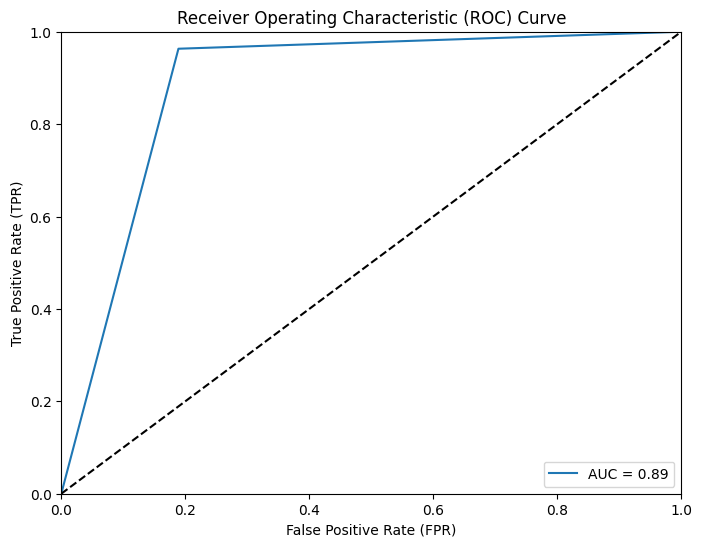

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_labels_4)

auc = roc_auc_score(y_test, y_pred_labels_4)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [51]:
params_4 = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 16,                   # Maximum depth of each tree
    'learning_rate': 0.0001,            # Step size shrinkage to prevent overfitting
    'num_boost_round': 500              # Number of boosting rounds (trees)
}

In [52]:
with tqdm(total=params_4['num_boost_round']) as pbar:
    for i in range(params_4['num_boost_round']):
        model_5 = xgb.train(params_4, dtrain, num_boost_round=1)
        pbar.update(1)

  0%|          | 0/500 [00:00<?, ?it/s]

[18:12:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  0%|          | 1/500 [00:07<1:05:54,  7.92s/it]

[18:12:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  0%|          | 2/500 [00:16<1:07:24,  8.12s/it]

[18:12:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|          | 3/500 [00:23<1:03:45,  7.70s/it]

[18:12:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|          | 4/500 [00:31<1:04:54,  7.85s/it]

[18:12:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|          | 5/500 [00:38<1:02:39,  7.59s/it]

[18:13:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|          | 6/500 [00:46<1:02:09,  7.55s/it]

[18:13:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  1%|▏         | 7/500 [00:54<1:03:47,  7.76s/it]

[18:13:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 8/500 [01:01<1:03:01,  7.69s/it]

[18:13:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 9/500 [01:10<1:04:18,  7.86s/it]

[18:13:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 10/500 [01:17<1:02:43,  7.68s/it]

[18:13:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 11/500 [01:24<1:02:22,  7.65s/it]

[18:13:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  2%|▏         | 12/500 [01:32<1:01:11,  7.52s/it]

[18:13:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  3%|▎         | 13/500 [01:39<1:00:25,  7.45s/it]

[18:14:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  3%|▎         | 14/500 [01:47<1:02:41,  7.74s/it]

[18:14:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  3%|▎         | 15/500 [01:55<1:01:42,  7.63s/it]

[18:14:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  3%|▎         | 16/500 [02:03<1:02:35,  7.76s/it]

[18:14:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  3%|▎         | 17/500 [02:10<1:00:59,  7.58s/it]

[18:14:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▎         | 18/500 [02:17<1:00:43,  7.56s/it]

[18:14:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▍         | 19/500 [02:26<1:02:34,  7.80s/it]

[18:14:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▍         | 20/500 [02:33<1:01:32,  7.69s/it]

[18:14:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▍         | 21/500 [02:42<1:03:13,  7.92s/it]

[18:15:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  4%|▍         | 22/500 [02:49<1:01:34,  7.73s/it]

[18:15:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  5%|▍         | 23/500 [02:56<1:00:45,  7.64s/it]

[18:15:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  5%|▍         | 24/500 [03:05<1:02:15,  7.85s/it]

[18:15:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  5%|▌         | 25/500 [03:12<1:01:02,  7.71s/it]

[18:15:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  5%|▌         | 26/500 [03:21<1:02:52,  7.96s/it]

[18:15:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  5%|▌         | 27/500 [03:28<1:01:06,  7.75s/it]

[18:15:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▌         | 28/500 [03:35<1:00:24,  7.68s/it]

[18:15:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▌         | 29/500 [03:43<1:00:58,  7.77s/it]

[18:16:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▌         | 30/500 [03:51<1:00:10,  7.68s/it]

[18:16:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▌         | 31/500 [03:59<1:01:41,  7.89s/it]

[18:16:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  6%|▋         | 32/500 [04:07<1:00:04,  7.70s/it]

[18:16:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  7%|▋         | 33/500 [04:14<1:00:03,  7.72s/it]

[18:16:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  7%|▋         | 34/500 [04:22<58:57,  7.59s/it]  

[18:16:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  7%|▋         | 35/500 [04:29<58:32,  7.55s/it]

[18:16:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  7%|▋         | 36/500 [04:37<1:00:26,  7.82s/it]

[18:17:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  7%|▋         | 37/500 [04:45<59:22,  7.69s/it]  

[18:17:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 38/500 [04:53<1:00:13,  7.82s/it]

[18:17:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 39/500 [05:00<59:15,  7.71s/it]  

[18:17:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 40/500 [05:08<58:40,  7.65s/it]

[18:17:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 41/500 [05:16<1:00:19,  7.89s/it]

[18:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  8%|▊         | 42/500 [05:24<58:49,  7.71s/it]  

[18:17:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  9%|▊         | 43/500 [05:32<59:42,  7.84s/it]

[18:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  9%|▉         | 44/500 [05:39<58:24,  7.69s/it]

[18:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  9%|▉         | 45/500 [05:47<57:40,  7.60s/it]

[18:18:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  9%|▉         | 46/500 [05:55<59:41,  7.89s/it]

[18:18:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



  9%|▉         | 47/500 [06:02<58:15,  7.72s/it]

[18:18:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|▉         | 48/500 [06:11<59:39,  7.92s/it]

[18:18:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|▉         | 49/500 [06:18<58:02,  7.72s/it]

[18:18:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|█         | 50/500 [06:26<57:40,  7.69s/it]

[18:18:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|█         | 51/500 [06:34<58:53,  7.87s/it]

[18:18:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 10%|█         | 52/500 [06:41<57:45,  7.74s/it]

[18:19:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 11%|█         | 53/500 [06:50<59:18,  7.96s/it]

[18:19:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 11%|█         | 54/500 [06:57<57:35,  7.75s/it]

[18:19:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 11%|█         | 55/500 [07:05<57:06,  7.70s/it]

[18:19:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 11%|█         | 56/500 [07:12<57:02,  7.71s/it]

[18:19:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 11%|█▏        | 57/500 [07:20<56:32,  7.66s/it]

[18:19:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 58/500 [07:29<58:17,  7.91s/it]

[18:19:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 59/500 [07:36<56:56,  7.75s/it]

[18:19:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 60/500 [07:44<56:57,  7.77s/it]

[18:20:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 61/500 [07:51<55:44,  7.62s/it]

[18:20:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 12%|█▏        | 62/500 [07:58<55:19,  7.58s/it]

[18:20:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 13%|█▎        | 63/500 [08:07<56:58,  7.82s/it]

[18:20:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 13%|█▎        | 64/500 [08:14<55:39,  7.66s/it]

[18:20:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 13%|█▎        | 65/500 [08:22<56:44,  7.83s/it]

[18:20:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 13%|█▎        | 66/500 [08:30<55:33,  7.68s/it]

[18:20:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 13%|█▎        | 67/500 [08:37<54:53,  7.61s/it]

[18:21:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▎        | 68/500 [08:46<56:40,  7.87s/it]

[18:21:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▍        | 69/500 [08:53<55:26,  7.72s/it]

[18:21:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▍        | 70/500 [09:01<56:36,  7.90s/it]

[18:21:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▍        | 71/500 [09:09<55:09,  7.72s/it]

[18:21:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 14%|█▍        | 72/500 [09:16<54:46,  7.68s/it]

[18:21:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 15%|█▍        | 73/500 [09:24<55:39,  7.82s/it]

[18:21:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 15%|█▍        | 74/500 [09:32<55:06,  7.76s/it]

[18:21:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 15%|█▌        | 75/500 [09:40<56:15,  7.94s/it]

[18:22:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 15%|█▌        | 76/500 [09:48<55:06,  7.80s/it]

[18:22:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 15%|█▌        | 77/500 [09:55<54:48,  7.78s/it]

[18:22:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▌        | 78/500 [10:03<54:25,  7.74s/it]

[18:22:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▌        | 79/500 [10:11<53:56,  7.69s/it]

[18:22:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▌        | 80/500 [10:19<55:19,  7.90s/it]

[18:22:42] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▌        | 81/500 [10:26<53:55,  7.72s/it]

[18:22:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 16%|█▋        | 82/500 [10:34<54:01,  7.76s/it]

[18:22:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 17%|█▋        | 83/500 [10:42<53:14,  7.66s/it]

[18:23:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 17%|█▋        | 84/500 [10:49<52:55,  7.63s/it]

[18:23:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 17%|█▋        | 85/500 [10:58<54:21,  7.86s/it]

[18:23:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 17%|█▋        | 86/500 [11:05<53:05,  7.70s/it]

[18:23:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 17%|█▋        | 87/500 [11:13<53:41,  7.80s/it]

[18:23:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 88/500 [11:20<52:30,  7.65s/it]

[18:23:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 89/500 [11:28<52:08,  7.61s/it]

[18:23:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 90/500 [11:36<54:03,  7.91s/it]

[18:24:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 91/500 [11:44<52:40,  7.73s/it]

[18:24:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 18%|█▊        | 92/500 [11:52<53:29,  7.87s/it]

[18:24:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 19%|█▊        | 93/500 [11:59<52:14,  7.70s/it]

[18:24:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 19%|█▉        | 94/500 [12:07<51:41,  7.64s/it]

[18:24:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 19%|█▉        | 95/500 [12:15<53:20,  7.90s/it]

[18:24:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 19%|█▉        | 96/500 [12:23<51:58,  7.72s/it]

[18:24:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 19%|█▉        | 97/500 [12:31<53:18,  7.94s/it]

[18:24:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|█▉        | 98/500 [12:38<52:03,  7.77s/it]

[18:25:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|█▉        | 99/500 [12:46<51:24,  7.69s/it]

[18:25:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|██        | 100/500 [12:54<52:15,  7.84s/it]

[18:25:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|██        | 101/500 [13:01<51:15,  7.71s/it]

[18:25:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 20%|██        | 102/500 [13:10<52:57,  7.98s/it]

[18:25:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 21%|██        | 103/500 [13:17<51:28,  7.78s/it]

[18:25:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 21%|██        | 104/500 [13:25<51:06,  7.74s/it]

[18:25:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 21%|██        | 105/500 [13:33<50:47,  7.72s/it]

[18:25:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 21%|██        | 106/500 [13:40<50:18,  7.66s/it]

[18:26:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 21%|██▏       | 107/500 [13:49<51:31,  7.87s/it]

[18:26:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 108/500 [13:56<50:12,  7.69s/it]

[18:26:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 109/500 [14:04<50:11,  7.70s/it]

[18:26:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 110/500 [14:11<49:10,  7.57s/it]

[18:26:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 111/500 [14:19<50:20,  7.77s/it]

[18:26:42] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 22%|██▏       | 112/500 [14:27<51:19,  7.94s/it]

[18:26:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 23%|██▎       | 113/500 [14:35<50:03,  7.76s/it]

[18:26:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 23%|██▎       | 114/500 [14:43<50:18,  7.82s/it]

[18:27:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 23%|██▎       | 115/500 [14:50<49:26,  7.70s/it]

[18:27:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 23%|██▎       | 116/500 [14:58<48:57,  7.65s/it]

[18:27:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 23%|██▎       | 117/500 [15:06<50:21,  7.89s/it]

[18:27:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▎       | 118/500 [15:13<49:05,  7.71s/it]

[18:27:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▍       | 119/500 [15:22<50:01,  7.88s/it]

[18:27:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▍       | 120/500 [15:29<48:47,  7.70s/it]

[18:27:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▍       | 121/500 [15:37<48:20,  7.65s/it]

[18:28:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 24%|██▍       | 122/500 [15:45<49:47,  7.90s/it]

[18:28:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 25%|██▍       | 123/500 [15:52<48:33,  7.73s/it]

[18:28:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 25%|██▍       | 124/500 [16:01<49:35,  7.91s/it]

[18:28:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 25%|██▌       | 125/500 [16:08<48:14,  7.72s/it]

[18:28:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 25%|██▌       | 126/500 [16:16<47:51,  7.68s/it]

[18:28:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 25%|██▌       | 127/500 [16:24<48:35,  7.82s/it]

[18:28:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▌       | 128/500 [16:31<47:58,  7.74s/it]

[18:28:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▌       | 129/500 [16:40<48:52,  7.90s/it]

[18:29:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▌       | 130/500 [16:47<47:55,  7.77s/it]

[18:29:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▌       | 131/500 [16:55<47:28,  7.72s/it]

[18:29:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 26%|██▋       | 132/500 [17:02<47:04,  7.68s/it]

[18:29:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 27%|██▋       | 133/500 [17:10<46:33,  7.61s/it]

[18:29:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 27%|██▋       | 134/500 [17:18<47:56,  7.86s/it]

[18:29:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 27%|██▋       | 135/500 [17:25<46:44,  7.68s/it]

[18:29:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 27%|██▋       | 136/500 [17:33<46:43,  7.70s/it]

[18:29:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 27%|██▋       | 137/500 [17:40<45:53,  7.59s/it]

[18:30:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 138/500 [17:48<45:38,  7.57s/it]

[18:30:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 139/500 [17:56<47:02,  7.82s/it]

[18:30:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 140/500 [18:04<45:50,  7.64s/it]

[18:30:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 141/500 [18:12<46:35,  7.79s/it]

[18:30:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 28%|██▊       | 142/500 [18:19<45:34,  7.64s/it]

[18:30:42] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 29%|██▊       | 143/500 [18:26<45:12,  7.60s/it]

[18:30:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 29%|██▉       | 144/500 [18:35<46:45,  7.88s/it]

[18:30:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 29%|██▉       | 145/500 [18:42<45:43,  7.73s/it]

[18:31:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 29%|██▉       | 146/500 [18:51<46:28,  7.88s/it]

[18:31:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 29%|██▉       | 147/500 [18:58<45:30,  7.74s/it]

[18:31:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|██▉       | 148/500 [19:05<44:57,  7.66s/it]

[18:31:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|██▉       | 149/500 [19:14<46:24,  7.93s/it]

[18:31:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|███       | 150/500 [19:21<45:10,  7.75s/it]

[18:31:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|███       | 151/500 [19:30<45:52,  7.89s/it]

[18:31:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 30%|███       | 152/500 [19:37<44:50,  7.73s/it]

[18:32:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 31%|███       | 153/500 [19:44<44:17,  7.66s/it]

[18:32:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 31%|███       | 154/500 [19:53<45:16,  7.85s/it]

[18:32:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 31%|███       | 155/500 [20:00<44:25,  7.73s/it]

[18:32:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 31%|███       | 156/500 [20:09<45:41,  7.97s/it]

[18:32:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 31%|███▏      | 157/500 [20:16<44:20,  7.76s/it]

[18:32:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 158/500 [20:24<44:05,  7.74s/it]

[18:32:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 159/500 [20:31<43:43,  7.69s/it]

[18:32:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 160/500 [20:39<43:29,  7.67s/it]

[18:33:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 161/500 [20:47<44:28,  7.87s/it]

[18:33:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 32%|███▏      | 162/500 [20:55<43:24,  7.71s/it]

[18:33:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 33%|███▎      | 163/500 [21:02<43:18,  7.71s/it]

[18:33:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 33%|███▎      | 164/500 [21:10<42:25,  7.58s/it]

[18:33:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 33%|███▎      | 165/500 [21:17<42:05,  7.54s/it]

[18:33:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 33%|███▎      | 166/500 [21:25<43:30,  7.82s/it]

[18:33:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 33%|███▎      | 167/500 [21:33<42:42,  7.69s/it]

[18:33:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▎      | 168/500 [21:41<43:19,  7.83s/it]

[18:34:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▍      | 169/500 [21:48<42:35,  7.72s/it]

[18:34:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▍      | 170/500 [21:56<42:22,  7.71s/it]

[18:34:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▍      | 171/500 [22:05<43:43,  7.97s/it]

[18:34:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 34%|███▍      | 172/500 [22:12<42:30,  7.78s/it]

[18:34:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 35%|███▍      | 173/500 [22:20<42:59,  7.89s/it]

[18:34:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 35%|███▍      | 174/500 [22:27<41:53,  7.71s/it]

[18:34:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 35%|███▌      | 175/500 [22:35<41:26,  7.65s/it]

[18:34:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 35%|███▌      | 176/500 [22:43<42:37,  7.89s/it]

[18:35:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 35%|███▌      | 177/500 [22:51<41:36,  7.73s/it]

[18:35:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▌      | 178/500 [22:59<42:23,  7.90s/it]

[18:35:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▌      | 179/500 [23:06<41:01,  7.67s/it]

[18:35:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▌      | 180/500 [23:14<40:41,  7.63s/it]

[18:35:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▌      | 181/500 [23:22<42:18,  7.96s/it]

[18:35:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 36%|███▋      | 182/500 [23:30<41:32,  7.84s/it]

[18:35:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 37%|███▋      | 183/500 [23:38<41:56,  7.94s/it]

[18:36:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 37%|███▋      | 184/500 [23:46<41:02,  7.79s/it]

[18:36:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 37%|███▋      | 185/500 [23:53<40:37,  7.74s/it]

[18:36:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 37%|███▋      | 186/500 [24:02<41:46,  7.98s/it]

[18:36:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 37%|███▋      | 187/500 [24:09<40:40,  7.80s/it]

[18:36:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 188/500 [24:17<41:19,  7.95s/it]

[18:36:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 189/500 [24:25<40:19,  7.78s/it]

[18:36:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 190/500 [24:33<39:56,  7.73s/it]

[18:36:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 191/500 [24:41<41:06,  7.98s/it]

[18:37:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 38%|███▊      | 192/500 [24:49<40:08,  7.82s/it]

[18:37:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 39%|███▊      | 193/500 [24:57<40:35,  7.93s/it]

[18:37:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 39%|███▉      | 194/500 [25:04<39:36,  7.77s/it]

[18:37:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 39%|███▉      | 195/500 [25:12<39:05,  7.69s/it]

[18:37:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 39%|███▉      | 196/500 [25:20<40:31,  8.00s/it]

[18:37:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 39%|███▉      | 197/500 [25:28<39:29,  7.82s/it]

[18:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|███▉      | 198/500 [25:36<39:56,  7.94s/it]

[18:37:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|███▉      | 199/500 [25:43<39:03,  7.78s/it]

[18:38:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|████      | 200/500 [25:51<38:33,  7.71s/it]

[18:38:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|████      | 201/500 [25:59<39:44,  7.97s/it]

[18:38:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 40%|████      | 202/500 [26:07<38:51,  7.82s/it]

[18:38:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 41%|████      | 203/500 [26:15<39:16,  7.94s/it]

[18:38:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 41%|████      | 204/500 [26:23<38:23,  7.78s/it]

[18:38:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 41%|████      | 205/500 [26:30<38:09,  7.76s/it]

[18:38:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 41%|████      | 206/500 [26:39<38:52,  7.93s/it]

[18:39:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 41%|████▏     | 207/500 [26:46<38:08,  7.81s/it]

[18:39:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 208/500 [26:55<38:49,  7.98s/it]

[18:39:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 209/500 [27:02<37:49,  7.80s/it]

[18:39:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 210/500 [27:09<37:19,  7.72s/it]

[18:39:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 211/500 [27:18<38:14,  7.94s/it]

[18:39:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 42%|████▏     | 212/500 [27:25<37:24,  7.79s/it]

[18:39:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 43%|████▎     | 213/500 [27:34<37:59,  7.94s/it]

[18:39:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 43%|████▎     | 214/500 [27:41<37:10,  7.80s/it]

[18:40:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 43%|████▎     | 215/500 [27:49<36:39,  7.72s/it]

[18:40:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 43%|████▎     | 216/500 [27:57<37:43,  7.97s/it]

[18:40:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 43%|████▎     | 217/500 [28:05<36:43,  7.79s/it]

[18:40:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▎     | 218/500 [28:13<37:19,  7.94s/it]

[18:40:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▍     | 219/500 [28:20<36:22,  7.77s/it]

[18:40:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▍     | 220/500 [28:28<36:00,  7.72s/it]

[18:40:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▍     | 221/500 [28:36<36:55,  7.94s/it]

[18:40:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 44%|████▍     | 222/500 [28:44<35:58,  7.76s/it]

[18:41:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 45%|████▍     | 223/500 [28:52<36:38,  7.94s/it]

[18:41:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 45%|████▍     | 224/500 [28:59<35:35,  7.74s/it]

[18:41:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 45%|████▌     | 225/500 [29:07<35:11,  7.68s/it]

[18:41:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 45%|████▌     | 226/500 [29:15<35:10,  7.70s/it]

[18:41:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 45%|████▌     | 227/500 [29:22<34:50,  7.66s/it]

[18:41:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▌     | 228/500 [29:30<35:31,  7.84s/it]

[18:41:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▌     | 229/500 [29:38<34:51,  7.72s/it]

[18:42:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▌     | 230/500 [29:45<34:37,  7.69s/it]

[18:42:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▌     | 231/500 [29:53<34:40,  7.73s/it]

[18:42:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 46%|████▋     | 232/500 [30:01<34:18,  7.68s/it]

[18:42:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 47%|████▋     | 233/500 [30:09<35:15,  7.92s/it]

[18:42:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 47%|████▋     | 234/500 [30:17<34:22,  7.75s/it]

[18:42:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 47%|████▋     | 235/500 [30:24<34:10,  7.74s/it]

[18:42:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 47%|████▋     | 236/500 [30:32<33:33,  7.63s/it]

[18:42:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 47%|████▋     | 237/500 [30:39<33:13,  7.58s/it]

[18:43:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 238/500 [30:48<34:12,  7.83s/it]

[18:43:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 239/500 [30:55<33:24,  7.68s/it]

[18:43:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 240/500 [31:03<33:38,  7.76s/it]

[18:43:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 241/500 [31:10<32:52,  7.61s/it]

[18:43:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 48%|████▊     | 242/500 [31:18<32:41,  7.60s/it]

[18:43:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 49%|████▊     | 243/500 [31:26<33:37,  7.85s/it]

[18:43:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 49%|████▉     | 244/500 [31:34<32:59,  7.73s/it]

[18:43:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 49%|████▉     | 245/500 [31:42<33:28,  7.88s/it]

[18:44:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 49%|████▉     | 246/500 [31:49<32:40,  7.72s/it]

[18:44:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 49%|████▉     | 247/500 [31:57<32:13,  7.64s/it]

[18:44:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|████▉     | 248/500 [32:05<33:20,  7.94s/it]

[18:44:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|████▉     | 249/500 [32:13<32:27,  7.76s/it]

[18:44:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|█████     | 250/500 [32:21<33:01,  7.92s/it]

[18:44:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|█████     | 251/500 [32:28<32:03,  7.73s/it]

[18:44:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 50%|█████     | 252/500 [32:36<31:29,  7.62s/it]

[18:44:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 51%|█████     | 253/500 [32:44<32:03,  7.79s/it]

[18:45:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 51%|█████     | 254/500 [32:51<31:34,  7.70s/it]

[18:45:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 51%|█████     | 255/500 [33:00<32:18,  7.91s/it]

[18:45:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 51%|█████     | 256/500 [33:07<31:30,  7.75s/it]

[18:45:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 51%|█████▏    | 257/500 [33:15<31:17,  7.73s/it]

[18:45:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 258/500 [33:23<31:37,  7.84s/it]

[18:45:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 259/500 [33:30<31:06,  7.74s/it]

[18:45:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 260/500 [33:39<31:54,  7.98s/it]

[18:46:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 261/500 [33:46<30:57,  7.77s/it]

[18:46:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 52%|█████▏    | 262/500 [33:54<30:33,  7.70s/it]

[18:46:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 53%|█████▎    | 263/500 [34:01<30:11,  7.64s/it]

[18:46:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 53%|█████▎    | 264/500 [34:09<29:49,  7.58s/it]

[18:46:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 53%|█████▎    | 265/500 [34:17<30:45,  7.85s/it]

[18:46:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 53%|█████▎    | 266/500 [34:24<29:52,  7.66s/it]

[18:46:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 53%|█████▎    | 267/500 [34:32<29:47,  7.67s/it]

[18:46:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▎    | 268/500 [34:39<29:06,  7.53s/it]

[18:47:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▍    | 269/500 [34:47<28:50,  7.49s/it]

[18:47:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▍    | 270/500 [34:55<29:49,  7.78s/it]

[18:47:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▍    | 271/500 [35:02<29:01,  7.60s/it]

[18:47:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 54%|█████▍    | 272/500 [35:11<29:49,  7.85s/it]

[18:47:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▍    | 273/500 [35:18<29:03,  7.68s/it]

[18:47:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▍    | 274/500 [35:26<28:54,  7.67s/it]

[18:47:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▌    | 275/500 [35:34<29:40,  7.92s/it]

[18:47:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▌    | 276/500 [35:42<29:09,  7.81s/it]

[18:48:05] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 55%|█████▌    | 277/500 [35:50<29:26,  7.92s/it]

[18:48:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▌    | 278/500 [35:57<28:37,  7.74s/it]

[18:48:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▌    | 279/500 [36:05<28:08,  7.64s/it]

[18:48:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▌    | 280/500 [36:13<28:39,  7.82s/it]

[18:48:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▌    | 281/500 [36:20<28:07,  7.70s/it]

[18:48:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 56%|█████▋    | 282/500 [36:29<28:53,  7.95s/it]

[18:48:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▋    | 283/500 [36:36<28:05,  7.77s/it]

[18:48:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▋    | 284/500 [36:44<27:38,  7.68s/it]

[18:49:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▋    | 285/500 [36:52<27:49,  7.77s/it]

[18:49:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▋    | 286/500 [36:59<27:22,  7.68s/it]

[18:49:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 57%|█████▋    | 287/500 [37:07<27:58,  7.88s/it]

[18:49:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 288/500 [37:15<27:14,  7.71s/it]

[18:49:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 289/500 [37:22<27:04,  7.70s/it]

[18:49:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 290/500 [37:30<26:30,  7.58s/it]

[18:49:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 291/500 [37:37<26:16,  7.54s/it]

[18:50:00] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 58%|█████▊    | 292/500 [37:45<27:00,  7.79s/it]

[18:50:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 59%|█████▊    | 293/500 [37:53<26:28,  7.68s/it]

[18:50:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 59%|█████▉    | 294/500 [38:01<26:45,  7.79s/it]

[18:50:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 59%|█████▉    | 295/500 [38:08<26:10,  7.66s/it]

[18:50:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 59%|█████▉    | 296/500 [38:16<25:51,  7.60s/it]

[18:50:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 59%|█████▉    | 297/500 [38:24<26:38,  7.87s/it]

[18:50:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|█████▉    | 298/500 [38:32<26:02,  7.74s/it]

[18:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|█████▉    | 299/500 [38:40<26:22,  7.87s/it]

[18:51:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|██████    | 300/500 [38:47<25:47,  7.74s/it]

[18:51:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|██████    | 301/500 [38:55<25:23,  7.66s/it]

[18:51:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 60%|██████    | 302/500 [39:03<26:04,  7.90s/it]

[18:51:26] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 61%|██████    | 303/500 [39:11<25:27,  7.75s/it]

[18:51:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 61%|██████    | 304/500 [39:19<25:54,  7.93s/it]

[18:51:42] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 61%|██████    | 305/500 [39:26<25:09,  7.74s/it]

[18:51:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 61%|██████    | 306/500 [39:34<24:53,  7.70s/it]

[18:51:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 61%|██████▏   | 307/500 [39:42<25:32,  7.94s/it]

[18:52:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 308/500 [39:50<24:56,  7.79s/it]

[18:52:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 309/500 [39:58<25:13,  7.92s/it]

[18:52:21] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 310/500 [40:05<24:33,  7.76s/it]

[18:52:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 311/500 [40:13<24:16,  7.71s/it]

[18:52:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 62%|██████▏   | 312/500 [40:22<25:01,  7.98s/it]

[18:52:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 63%|██████▎   | 313/500 [40:29<24:16,  7.79s/it]

[18:52:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 63%|██████▎   | 314/500 [40:37<24:39,  7.96s/it]

[18:53:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 63%|██████▎   | 315/500 [40:45<24:01,  7.79s/it]

[18:53:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 63%|██████▎   | 316/500 [40:52<23:41,  7.72s/it]

[18:53:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 63%|██████▎   | 317/500 [41:01<24:28,  8.03s/it]

[18:53:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▎   | 318/500 [41:08<23:48,  7.85s/it]

[18:53:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▍   | 319/500 [41:17<24:01,  7.97s/it]

[18:53:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▍   | 320/500 [41:24<23:20,  7.78s/it]

[18:53:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▍   | 321/500 [41:32<23:00,  7.71s/it]

[18:53:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 64%|██████▍   | 322/500 [41:40<23:46,  8.02s/it]

[18:54:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 65%|██████▍   | 323/500 [41:48<23:11,  7.86s/it]

[18:54:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 65%|██████▍   | 324/500 [41:56<23:29,  8.01s/it]

[18:54:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 65%|██████▌   | 325/500 [42:04<22:56,  7.86s/it]

[18:54:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 65%|██████▌   | 326/500 [42:11<22:39,  7.81s/it]

[18:54:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 65%|██████▌   | 327/500 [42:20<23:15,  8.07s/it]

[18:54:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▌   | 328/500 [42:28<22:38,  7.90s/it]

[18:54:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▌   | 329/500 [42:35<22:28,  7.89s/it]

[18:54:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▌   | 330/500 [42:43<21:53,  7.73s/it]

[18:55:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▌   | 331/500 [42:51<21:47,  7.74s/it]

[18:55:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 66%|██████▋   | 332/500 [42:59<22:15,  7.95s/it]

[18:55:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 67%|██████▋   | 333/500 [43:06<21:40,  7.79s/it]

[18:55:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 67%|██████▋   | 334/500 [43:15<21:50,  7.90s/it]

[18:55:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 67%|██████▋   | 335/500 [43:22<21:25,  7.79s/it]

[18:55:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 67%|██████▋   | 336/500 [43:30<21:10,  7.75s/it]

[18:55:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 67%|██████▋   | 337/500 [43:38<21:27,  7.90s/it]

[18:56:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 338/500 [43:45<20:55,  7.75s/it]

[18:56:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 339/500 [43:53<21:03,  7.85s/it]

[18:56:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 340/500 [44:01<20:39,  7.74s/it]

[18:56:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 341/500 [44:08<20:16,  7.65s/it]

[18:56:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 68%|██████▊   | 342/500 [44:17<20:55,  7.94s/it]

[18:56:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 69%|██████▊   | 343/500 [44:24<20:23,  7.80s/it]

[18:56:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 69%|██████▉   | 344/500 [44:33<20:37,  7.93s/it]

[18:56:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 69%|██████▉   | 345/500 [44:40<20:06,  7.78s/it]

[18:57:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 69%|██████▉   | 346/500 [44:48<19:51,  7.74s/it]

[18:57:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 69%|██████▉   | 347/500 [44:56<20:18,  7.96s/it]

[18:57:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|██████▉   | 348/500 [45:04<19:44,  7.79s/it]

[18:57:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|██████▉   | 349/500 [45:12<19:57,  7.93s/it]

[18:57:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|███████   | 350/500 [45:19<19:23,  7.76s/it]

[18:57:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|███████   | 351/500 [45:27<19:08,  7.71s/it]

[18:57:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 70%|███████   | 352/500 [45:35<19:36,  7.95s/it]

[18:57:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 71%|███████   | 353/500 [45:43<19:06,  7.80s/it]

[18:58:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 71%|███████   | 354/500 [45:51<19:25,  7.99s/it]

[18:58:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 71%|███████   | 355/500 [45:59<18:50,  7.80s/it]

[18:58:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 71%|███████   | 356/500 [46:06<18:42,  7.80s/it]

[18:58:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 71%|███████▏  | 357/500 [46:15<19:10,  8.05s/it]

[18:58:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 358/500 [46:22<18:35,  7.86s/it]

[18:58:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 359/500 [46:31<18:44,  7.97s/it]

[18:58:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 360/500 [46:38<18:16,  7.83s/it]

[18:59:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 361/500 [46:46<17:59,  7.77s/it]

[18:59:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 72%|███████▏  | 362/500 [46:54<18:27,  8.02s/it]

[18:59:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 73%|███████▎  | 363/500 [47:02<17:55,  7.85s/it]

[18:59:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 73%|███████▎  | 364/500 [47:10<18:02,  7.96s/it]

[18:59:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 73%|███████▎  | 365/500 [47:18<17:32,  7.80s/it]

[18:59:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 73%|███████▎  | 366/500 [47:25<17:15,  7.73s/it]

[18:59:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 73%|███████▎  | 367/500 [47:34<17:43,  8.00s/it]

[18:59:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▎  | 368/500 [47:41<17:08,  7.79s/it]

[19:00:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▍  | 369/500 [47:49<17:18,  7.93s/it]

[19:00:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▍  | 370/500 [47:57<16:49,  7.77s/it]

[19:00:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▍  | 371/500 [48:04<16:35,  7.71s/it]

[19:00:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 74%|███████▍  | 372/500 [48:13<17:00,  7.97s/it]

[19:00:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 75%|███████▍  | 373/500 [48:20<16:28,  7.78s/it]

[19:00:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 75%|███████▍  | 374/500 [48:29<16:46,  7.98s/it]

[19:00:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 75%|███████▌  | 375/500 [48:36<16:14,  7.80s/it]

[19:00:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 75%|███████▌  | 376/500 [48:44<16:01,  7.75s/it]

[19:01:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 75%|███████▌  | 377/500 [48:52<16:26,  8.02s/it]

[19:01:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▌  | 378/500 [49:00<16:04,  7.91s/it]

[19:01:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▌  | 379/500 [49:08<16:01,  7.94s/it]

[19:01:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▌  | 380/500 [49:15<15:32,  7.77s/it]

[19:01:39] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▌  | 381/500 [49:23<15:18,  7.72s/it]

[19:01:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 76%|███████▋  | 382/500 [49:31<15:31,  7.90s/it]

[19:01:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 77%|███████▋  | 383/500 [49:39<15:10,  7.78s/it]

[19:02:02] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 77%|███████▋  | 384/500 [49:47<15:18,  7.92s/it]

[19:02:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 77%|███████▋  | 385/500 [49:54<14:54,  7.78s/it]

[19:02:18] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 77%|███████▋  | 386/500 [50:02<14:35,  7.68s/it]

[19:02:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 77%|███████▋  | 387/500 [50:10<14:45,  7.84s/it]

[19:02:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 388/500 [50:18<14:25,  7.73s/it]

[19:02:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 389/500 [50:26<14:45,  7.97s/it]

[19:02:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 390/500 [50:33<14:16,  7.78s/it]

[19:02:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 391/500 [50:41<14:01,  7.72s/it]

[19:03:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 78%|███████▊  | 392/500 [50:49<13:56,  7.74s/it]

[19:03:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 79%|███████▊  | 393/500 [50:56<13:43,  7.69s/it]

[19:03:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 79%|███████▉  | 394/500 [51:05<14:04,  7.96s/it]

[19:03:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 79%|███████▉  | 395/500 [51:12<13:35,  7.77s/it]

[19:03:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 79%|███████▉  | 396/500 [51:20<13:28,  7.77s/it]

[19:03:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 79%|███████▉  | 397/500 [51:28<13:13,  7.71s/it]

[19:03:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|███████▉  | 398/500 [51:35<13:03,  7.68s/it]

[19:03:58] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|███████▉  | 399/500 [51:44<13:18,  7.90s/it]

[19:04:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|████████  | 400/500 [51:51<12:56,  7.76s/it]

[19:04:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|████████  | 401/500 [51:59<12:51,  7.79s/it]

[19:04:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 80%|████████  | 402/500 [52:06<12:30,  7.66s/it]

[19:04:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 81%|████████  | 403/500 [52:14<12:21,  7.65s/it]

[19:04:37] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 81%|████████  | 404/500 [52:22<12:39,  7.91s/it]

[19:04:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 81%|████████  | 405/500 [52:30<12:19,  7.78s/it]

[19:04:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 81%|████████  | 406/500 [52:38<12:12,  7.79s/it]

[19:05:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 81%|████████▏ | 407/500 [52:45<11:55,  7.70s/it]

[19:05:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 408/500 [52:53<11:44,  7.65s/it]

[19:05:16] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 409/500 [53:01<12:00,  7.92s/it]

[19:05:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 410/500 [53:09<11:37,  7.75s/it]

[19:05:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 411/500 [53:17<11:38,  7.84s/it]

[19:05:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 82%|████████▏ | 412/500 [53:24<11:18,  7.71s/it]

[19:05:47] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 83%|████████▎ | 413/500 [53:32<11:06,  7.66s/it]

[19:05:55] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 83%|████████▎ | 414/500 [53:40<11:22,  7.93s/it]

[19:06:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 83%|████████▎ | 415/500 [53:48<11:02,  7.79s/it]

[19:06:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 83%|████████▎ | 416/500 [53:56<11:07,  7.95s/it]

[19:06:19] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 83%|████████▎ | 417/500 [54:04<10:48,  7.81s/it]

[19:06:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▎ | 418/500 [54:11<10:36,  7.76s/it]

[19:06:34] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▍ | 419/500 [54:20<10:48,  8.00s/it]

[19:06:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▍ | 420/500 [54:27<10:26,  7.83s/it]

[19:06:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▍ | 421/500 [54:35<10:28,  7.96s/it]

[19:06:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 84%|████████▍ | 422/500 [54:43<10:11,  7.83s/it]

[19:07:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 85%|████████▍ | 423/500 [54:51<10:02,  7.82s/it]

[19:07:14] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 85%|████████▍ | 424/500 [54:59<10:10,  8.04s/it]

[19:07:23] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 85%|████████▌ | 425/500 [55:07<09:50,  7.87s/it]

[19:07:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 85%|████████▌ | 426/500 [55:15<09:42,  7.88s/it]

[19:07:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 85%|████████▌ | 427/500 [55:22<09:24,  7.73s/it]

[19:07:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▌ | 428/500 [55:30<09:13,  7.68s/it]

[19:07:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▌ | 429/500 [55:38<09:21,  7.91s/it]

[19:08:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▌ | 430/500 [55:46<09:05,  7.79s/it]

[19:08:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▌ | 431/500 [55:54<09:00,  7.83s/it]

[19:08:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 86%|████████▋ | 432/500 [56:01<08:45,  7.73s/it]

[19:08:24] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 87%|████████▋ | 433/500 [56:09<08:33,  7.66s/it]

[19:08:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 87%|████████▋ | 434/500 [56:17<08:42,  7.92s/it]

[19:08:40] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 87%|████████▋ | 435/500 [56:24<08:23,  7.75s/it]

[19:08:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 87%|████████▋ | 436/500 [56:33<08:27,  7.93s/it]

[19:08:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 87%|████████▋ | 437/500 [56:40<08:09,  7.77s/it]

[19:09:03] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 438/500 [56:48<07:57,  7.71s/it]

[19:09:11] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 439/500 [56:56<08:08,  8.01s/it]

[19:09:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 440/500 [57:04<07:50,  7.85s/it]

[19:09:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 441/500 [57:12<07:49,  7.96s/it]

[19:09:35] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 88%|████████▊ | 442/500 [57:19<07:31,  7.78s/it]

[19:09:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 89%|████████▊ | 443/500 [57:27<07:20,  7.73s/it]

[19:09:50] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 89%|████████▉ | 444/500 [57:36<07:25,  7.96s/it]

[19:09:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 89%|████████▉ | 445/500 [57:43<07:11,  7.85s/it]

[19:10:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 89%|████████▉ | 446/500 [57:51<07:08,  7.94s/it]

[19:10:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 89%|████████▉ | 447/500 [57:59<06:52,  7.79s/it]

[19:10:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|████████▉ | 448/500 [58:06<06:40,  7.70s/it]

[19:10:29] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|████████▉ | 449/500 [58:15<06:47,  7.99s/it]

[19:10:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|█████████ | 450/500 [58:22<06:29,  7.80s/it]

[19:10:45] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|█████████ | 451/500 [58:30<06:25,  7.87s/it]

[19:10:53] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 90%|█████████ | 452/500 [58:38<06:11,  7.74s/it]

[19:11:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 91%|█████████ | 453/500 [58:45<06:01,  7.69s/it]

[19:11:09] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 91%|█████████ | 454/500 [58:54<06:08,  8.02s/it]

[19:11:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 91%|█████████ | 455/500 [59:01<05:51,  7.81s/it]

[19:11:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 91%|█████████ | 456/500 [59:10<05:49,  7.95s/it]

[19:11:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 91%|█████████▏| 457/500 [59:17<05:37,  7.85s/it]

[19:11:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 458/500 [59:25<05:27,  7.81s/it]

[19:11:48] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 459/500 [59:33<05:28,  8.01s/it]

[19:11:57] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 460/500 [59:41<05:12,  7.82s/it]

[19:12:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 461/500 [59:49<05:07,  7.89s/it]

[19:12:12] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 92%|█████████▏| 462/500 [59:56<04:55,  7.76s/it]

[19:12:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 93%|█████████▎| 463/500 [1:00:04<04:46,  7.74s/it]

[19:12:27] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 93%|█████████▎| 464/500 [1:00:13<04:47,  7.97s/it]

[19:12:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 93%|█████████▎| 465/500 [1:00:20<04:33,  7.80s/it]

[19:12:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 93%|█████████▎| 466/500 [1:00:28<04:28,  7.89s/it]

[19:12:51] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 93%|█████████▎| 467/500 [1:00:36<04:15,  7.75s/it]

[19:12:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▎| 468/500 [1:00:43<04:06,  7.71s/it]

[19:13:06] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▍| 469/500 [1:00:52<04:06,  7.96s/it]

[19:13:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▍| 470/500 [1:00:59<03:53,  7.79s/it]

[19:13:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▍| 471/500 [1:01:07<03:49,  7.91s/it]

[19:13:30] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 94%|█████████▍| 472/500 [1:01:15<03:37,  7.77s/it]

[19:13:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 95%|█████████▍| 473/500 [1:01:22<03:28,  7.72s/it]

[19:13:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 95%|█████████▍| 474/500 [1:01:31<03:26,  7.95s/it]

[19:13:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 95%|█████████▌| 475/500 [1:01:38<03:15,  7.81s/it]

[19:14:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 95%|█████████▌| 476/500 [1:01:47<03:11,  7.97s/it]

[19:14:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 95%|█████████▌| 477/500 [1:01:54<02:59,  7.79s/it]

[19:14:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▌| 478/500 [1:02:02<02:49,  7.72s/it]

[19:14:25] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▌| 479/500 [1:02:10<02:47,  7.97s/it]

[19:14:33] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▌| 480/500 [1:02:18<02:36,  7.83s/it]

[19:14:41] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▌| 481/500 [1:02:26<02:30,  7.93s/it]

[19:14:49] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 96%|█████████▋| 482/500 [1:02:33<02:20,  7.79s/it]

[19:14:56] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 97%|█████████▋| 483/500 [1:02:41<02:11,  7.73s/it]

[19:15:04] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 97%|█████████▋| 484/500 [1:02:49<02:07,  7.98s/it]

[19:15:13] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 97%|█████████▋| 485/500 [1:02:57<01:57,  7.81s/it]

[19:15:20] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 97%|█████████▋| 486/500 [1:03:05<01:51,  7.93s/it]

[19:15:28] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 97%|█████████▋| 487/500 [1:03:12<01:41,  7.78s/it]

[19:15:36] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 488/500 [1:03:20<01:32,  7.75s/it]

[19:15:43] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 489/500 [1:03:29<01:28,  8.01s/it]

[19:15:52] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 490/500 [1:03:36<01:18,  7.83s/it]

[19:15:59] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 491/500 [1:03:44<01:10,  7.88s/it]

[19:16:07] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 98%|█████████▊| 492/500 [1:03:52<01:01,  7.74s/it]

[19:16:15] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 99%|█████████▊| 493/500 [1:03:59<00:53,  7.63s/it]

[19:16:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 99%|█████████▉| 494/500 [1:04:07<00:47,  7.91s/it]

[19:16:31] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 99%|█████████▉| 495/500 [1:04:15<00:38,  7.75s/it]

[19:16:38] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 99%|█████████▉| 496/500 [1:04:23<00:31,  7.91s/it]

[19:16:46] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



 99%|█████████▉| 497/500 [1:04:30<00:23,  7.74s/it]

[19:16:54] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



100%|█████████▉| 498/500 [1:04:38<00:15,  7.73s/it]

[19:17:01] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



100%|█████████▉| 499/500 [1:04:47<00:07,  8.00s/it]

[19:17:10] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



100%|██████████| 500/500 [1:04:54<00:00,  7.79s/it]


In [56]:
# Save the trained model
model_5.save_model("/content/drive/MyDrive/model_weights/model_5.h5")

In [53]:
# Make predictions
y_pred_prob_5 = model_5.predict(dtest)
y_pred_labels_5 = [1 if prob > 0.5 else 0 for prob in y_pred_prob_5]

In [54]:
#Evaluate the model
accuracy_5 = accuracy_score(y_test, y_pred_labels_5)
print(f"Accuracy: {accuracy_5}")

Accuracy: 0.9318628166635987


In [55]:
report_5 = classification_report(y_test, y_pred_labels_5)
print("Classification Report:\n", report_5)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93    393601
           1       0.93      0.94      0.93    394104

    accuracy                           0.93    787705
   macro avg       0.93      0.93      0.93    787705
weighted avg       0.93      0.93      0.93    787705



Text(0.5, 1.0, 'Confusion Matrix')

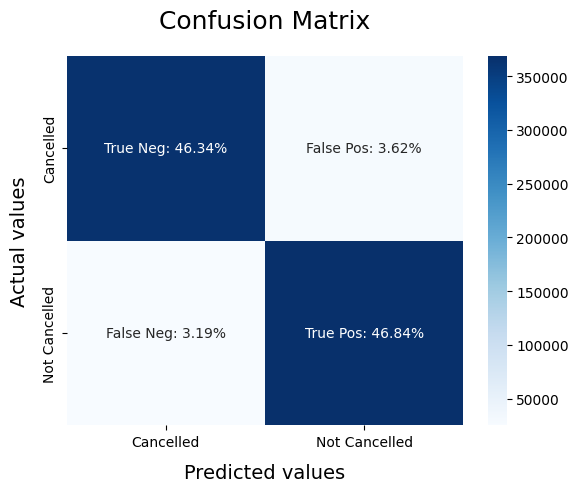

In [90]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_labels_5)
categories = ['Cancelled','Not Cancelled']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}: {v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

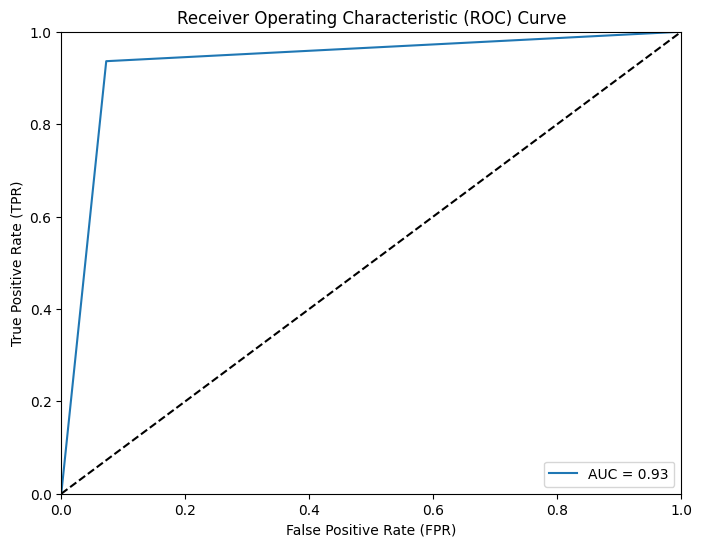

In [59]:
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_labels_5)

auc_1 = roc_auc_score(y_test, y_pred_labels_5)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, label=f'AUC = {auc_1:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 2) Bernoulli Naive Base

In [75]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [78]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

BernoulliNB()

In [79]:
y_pred = BNBmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.88
Confusion Matrix:
[[304206  89395]
 [  5788 388316]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86    393601
           1       0.81      0.99      0.89    394104

    accuracy                           0.88    787705
   macro avg       0.90      0.88      0.88    787705
weighted avg       0.90      0.88      0.88    787705



Text(0.5, 1.0, 'Confusion Matrix')

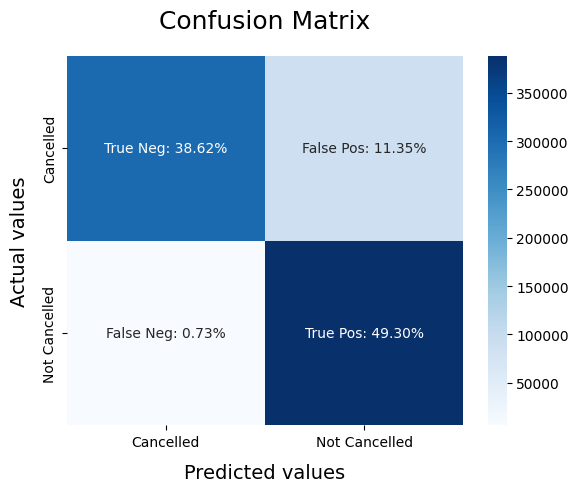

In [82]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Cancelled','Not Cancelled']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}: {v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

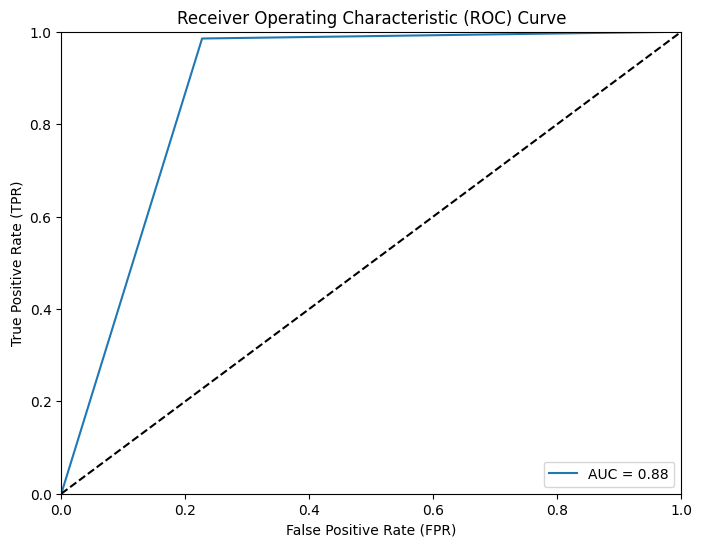

In [83]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred)

auc_2 = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_2, tpr_2, label=f'AUC = {auc_2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 3) Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

confusion = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(confusion)

report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report)

Accuracy: 0.98
Confusion Matrix:
[[388733   4868]
 [ 10977 383127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    393601
           1       0.99      0.97      0.98    394104

    accuracy                           0.98    787705
   macro avg       0.98      0.98      0.98    787705
weighted avg       0.98      0.98      0.98    787705



Text(0.5, 1.0, 'Confusion Matrix')

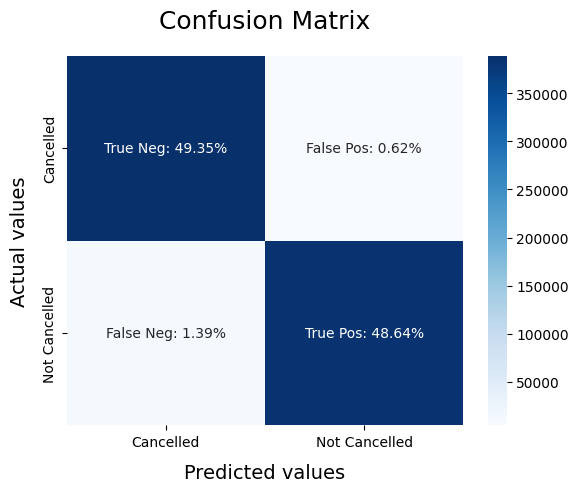

In [88]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
categories = ['Cancelled','Not Cancelled']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}: {v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

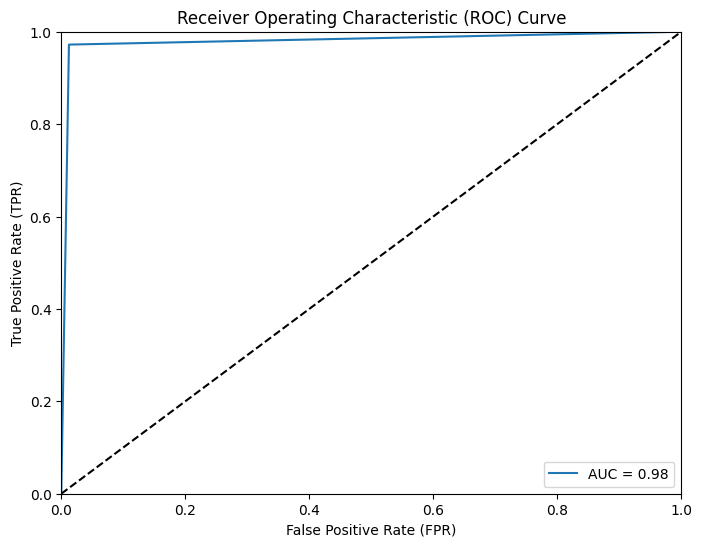

In [89]:
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_pred_rf)

auc_3 = roc_auc_score(y_test, y_pred_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_3, tpr_3, label=f'AUC = {auc_3:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()